# Data Mining: Cleaning data and Feature Engineering

*AmesHouse Real State* is a real estate company located in Ames (USA) which has a team of professionals interested in improving their business model. For now, they use classic market analysis methods using different factors to try to predict the price of the housing market in their area. Their analysis methods are complete, but they have the impression that they are missing some variable.

To complement and improve their predictions, *AmesHouse Real State* has contacted us because they are interested in having a powerful and accurate method to predict the price of houses located in that city. 

In order to solve this problem we are going to follow the Data Science methodology. Data Science is a discipline that uses scientific methods, algorithms and systems to extract insights and meaningful information from different types of data. Data science unifies statistics, data analysis and algebra in order to understand and analyze the problem

>dataset: `Ex 3.0. Data_to_clean.csv`

**Key info about the dataset:**

- `Kitchen` Number of kitchens
- `KitchenQual` Kitchen quality
- `TotRmsAbvGrd` Total rooms above grade (does not include bathrooms)
- `Functional` Home functionality rating
- `Fireplaces` Number of fireplaces
- `FireplaceQu` Fireplace quality
- `GarageType` Garage location
- `GarageYrBlt` Year garage was built
- `GarageFinish` Interior finish of the garage
- `GarageCars` Size of garage in car capacity
- `GarageArea` Size of garage in square feet
- `GarageQual` Garage quality
- `GarageCond` Garage condition
- `PavedDrive` Paved driveway
- `WoodDeckSF` Wood deck area in square feet
- `OpenPorchSF` Open porch area in square feet
- `EnclosedPorch` Enclosed porch area in square feet
- `3SsnPorch` Three season porch area in square feet
- `ScreenPorch` Screen porch area in square feet
- `PoolArea` Pool area in square feet
- `PoolQC` Pool quality
- `Fence` Fence quality
- `MiscFeature` Miscellaneous feature not covered in other categories
- `MiscVal` $Value of miscellaneous feature
- `MoSold` Month Sold
- `YrSold` Year Sold
- `SaleType` Type of sale
- `SaleCondition` Condition of sale

**Steps you should perform in the notebook (Data Mining + Feature Engineering)**
* Initally EDA
* Deal with missing values
* Transform to logarithmic scale non-normal distributions
* Scaling continuous features
* Dumify categorical features

## Loading data and libraries

In [6]:
# Adding needed libraries and reading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm
from scipy import stats
%matplotlib inline




In [7]:
import sys
sys.path.insert(0,'C:/Users/jugat/Documents/a_JUGATX/FORMACION/DATA SCIENCE/Functions')

from fx_OUTLIERS import *
from functions_plot_EDA import *
from Functions_ML_classification import *
from fx_MLClassification import *

In [8]:
SEED = 7
np.random.seed(SEED)

### Load Dataset

In [9]:
data = pd.read_csv('../dataset/P2. dataset.csv', error_bad_lines=False)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Exploratory Data Analysis

In [10]:
data.shape

(1460, 81)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check the percentage of missing values

In [12]:
# Get the columns that have any missing values and its percentage

In [13]:
def percentage_nullValues(data):
    null_perc = round(data.isnull().sum() / data.shape[0],3) * 100.00
    null_perc = pd.DataFrame(null_perc, columns=['Percentage_NaN'])
    null_perc= null_perc.sort_values(by = ['Percentage_NaN'], ascending = False)
    return null_perc

In [14]:
percentage_nullValues(data).head(20)

Percentage_NaN
PoolQC                  99.5
MiscFeature             96.3
Alley                   93.8
Fence                   80.8
FireplaceQu             47.3
LotFrontage             17.7
GarageYrBlt              5.5
GarageCond               5.5
GarageType               5.5
GarageFinish             5.5
GarageQual               5.5
BsmtFinType2             2.6
BsmtExposure             2.6
BsmtQual                 2.5
BsmtCond                 2.5
BsmtFinType1             2.5
MasVnrArea               0.5
MasVnrType               0.5
Electrical               0.1
Id                       0.0

`


`Check for the variables that contain a very high percentage of null values:`

`PoolQC, MiscFeature, Alley, Fence, FireplaceQu and LotFrontage`

In [15]:
data[(data.PoolArea != 0)]


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
197    198          75       RL        174.0    25419   Pave   NaN      Reg   
810    811          20       RL         78.0    10140   Pave   NaN      Reg   
1170  1171          80       RL         76.0     9880   Pave   NaN      Reg   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
1386  1387          60       RL         80.0    16692   Pave   NaN      IR1   
1423  1424          80       RL          NaN    19690   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
197          Lvl    AllPub  ...      512     Ex  GdPrv         NaN       0   
810          Lvl    AllPub  ...      648     Fa  GdPrv         NaN       0   
1170         Lvl    AllPub  ...      576     Gd  GdPrv         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   
1298         Bnk    AllPub  ...      480     Gd    NaN         NaN       0   
1386         Lvl    AllPub  ...      519     Fa  MnPrv        TenC    2000   
1423         Lvl    AllPub  ...      738     Gd  GdPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
197       3   2006        WD        Abnorml     235000  
810       1   2006        WD         Normal     181000  
1170      7   2008        WD         Normal     171000  
1182      7   2007        WD        Abnorml     745000  
1298      1   2008       New        Partial     160000  
1386      7   2006        WD         Normal     250000  
1423      8   2006        WD         Alloca     274970  

[7 rows x 81 columns]

In [16]:
data.drop(['PoolQC'], axis=1, inplace = True)

In [17]:
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [18]:
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [19]:
data[data['MiscFeature'] == 'Gar2']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
346    347          20       RL          NaN    12772   Pave   NaN      IR1   
1230  1231          90       RL          NaN    18890   Pave   NaN      IR1   

     LandContour Utilities  ... ScreenPorch PoolArea Fence MiscFeature  \
346          Lvl    AllPub  ...           0        0   NaN        Gar2   
1230         Lvl    AllPub  ...           0        0   NaN        Gar2   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
346    15500      4   2007        WD         Normal     151500  
1230    8300      8   2007        WD         Normal     190000  

[2 rows x 80 columns]

In [20]:
data.drop([346, 1230], axis = 0, inplace = True)

In [21]:
data[data['MiscFeature'] == 'Gar2']

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

In [22]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [23]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [24]:
data['FireplaceQu'].value_counts()

Gd    380
TA    312
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [25]:
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

`After reviewing them, we decided to drop them:`

In [26]:
data.drop(['MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace = True)

In [27]:
#Drop 'Id' column
data.drop(['Id'], axis=1, inplace = True)

In [28]:
data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    Inside       Gtl      CollgCr  ...             0         0           0   
1       FR2       Gtl      Veenker  ...             0         0           0   
2    Inside       Gtl      CollgCr  ...             0         0           0   
3    Corner       Gtl      Crawfor  ...           272         0           0   
4       FR2       Gtl      NoRidge  ...             0         0           0   

  PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition SalePrice  
0        0        0       2    2008        WD        Normal    208500  
1        0        0       5    2007        WD        Normal    181500  
2        0        0       9    2008        WD        Normal    223500  
3        0        0       2    2006        WD       Abnorml    140000  
4        0        0      12    2008        WD        Normal    250000  

[5 rows x 74 columns]


`- Drop the null values from variables that contain a small amount of them`


In [29]:
data = data.dropna()

`- Change the datatype of 'GarageYrBlt' and 'MasVnrArea' from float to int64`

In [30]:
data.GarageYrBlt.dtype

dtype('float64')

In [31]:
data.MasVnrArea.dtype

dtype('float64')

In [32]:
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    58
2004.0    53
2003.0    47
2007.0    45
          ..
1908.0     1
1900.0     1
1906.0     1
1933.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [33]:
data['GarageYrBlt'].astype('int64')

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1336, dtype: int64

In [34]:
data['MasVnrArea'].value_counts()

0.0      759
108.0      8
180.0      8
72.0       8
16.0       7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 325, dtype: int64

In [35]:
data['MasVnrArea'].astype('int64')

0       196
1         0
2       162
3         0
4       350
       ... 
1455      0
1456    119
1457      0
1458      0
1459      0
Name: MasVnrArea, Length: 1336, dtype: int64

`Check null values again after previous modifications`

In [36]:
percentage_nullValues(data)

Percentage_NaN
MSSubClass               0.0
GarageYrBlt              0.0
Fireplaces               0.0
Functional               0.0
TotRmsAbvGrd             0.0
...                      ...
ExterQual                0.0
MasVnrArea               0.0
MasVnrType               0.0
Exterior2nd              0.0
SalePrice                0.0

[74 rows x 1 columns]

In [37]:
data.shape

(1336, 74)

In [38]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1336, dtype: bool

In [39]:
data = data.drop_duplicates()

In [40]:
data.shape

(1336, 74)

### Categorical and numerical Variables

In [41]:
num_var = data.select_dtypes(include=['int64', 'float']).columns
print('Numerical variables are:\n', num_var)

Numerical variables are:
 Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [42]:
categ_var = data.select_dtypes(include=['category', object]).columns

print('Categorical variables are:\n', categ_var)

Categorical variables are:
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [43]:
data_cat = data[categ_var]
data_num = data[num_var]

In [44]:
data_num.shape

(1336, 36)

In [45]:
data_cat.shape

(1336, 38)

#### Analysis of Numerical Variables:

In [46]:
data_num.describe().T

count           mean           std      min        25%  \
MSSubClass     1336.0      56.137725     41.261209     20.0      20.00   
LotArea        1336.0   10698.622754  10341.778498   1300.0    7741.50   
OverallQual    1336.0       6.220808      1.325029      2.0       5.00   
OverallCond    1336.0       5.595060      1.076799      2.0       5.00   
YearBuilt      1336.0    1973.035928     29.583327   1880.0    1956.00   
YearRemodAdd   1336.0    1985.666168     20.307470   1950.0    1968.00   
MasVnrArea     1336.0     110.524701    185.695041      0.0       0.00   
BsmtFinSF1     1336.0     464.184132    459.134094      0.0       0.00   
BsmtFinSF2     1336.0      49.133982    166.256602      0.0       0.00   
BsmtUnfSF      1336.0     582.534431    440.263080      0.0     247.75   
TotalBsmtSF    1336.0    1095.852545    405.775697    105.0     818.75   
1stFlrSF       1336.0    1176.247006    386.855347    438.0     894.00   
2ndFlrSF       1336.0     356.733533    439.854063      0.0       0.00   
LowQualFinSF   1336.0       4.228293     40.743073      0.0       0.00   
GrLivArea      1336.0    1537.208832    519.884705    438.0    1162.00   
BsmtFullBath   1336.0       0.439371      0.515737      0.0       0.00   
BsmtHalfBath   1336.0       0.060629      0.241855      0.0       0.00   
FullBath       1336.0       1.575599      0.547630      0.0       1.00   
HalfBath       1336.0       0.401946      0.502544      0.0       0.00   
BedroomAbvGr   1336.0       2.864521      0.776277      0.0       2.00   
KitchenAbvGr   1336.0       1.029192      0.172797      1.0       1.00   
TotRmsAbvGrd   1336.0       6.547156      1.578657      3.0       5.00   
Fireplaces     1336.0       0.648952      0.645560      0.0       0.00   
GarageYrBlt    1336.0    1978.611527     24.787024   1900.0    1962.00   
GarageCars     1336.0       1.872006      0.634296      1.0       1.00   
GarageArea     1336.0     501.526198    186.801686    160.0     378.50   
WoodDeckSF     1336.0      99.417665    127.594492      0.0       0.00   
OpenPorchSF    1336.0      47.836078     65.395169      0.0       0.00   
EnclosedPorch  1336.0      21.187126     60.792440      0.0       0.00   
3SsnPorch      1336.0       3.591317     30.246935      0.0       0.00   
ScreenPorch    1336.0      16.458832     58.091570      0.0       0.00   
PoolArea       1336.0       3.014970     41.992595      0.0       0.00   
MiscVal        1336.0      25.182635    167.794621      0.0       0.00   
MoSold         1336.0       6.332335      2.700318      1.0       5.00   
YrSold         1336.0    2007.806886      1.331322   2006.0    2007.00   
SalePrice      1336.0  186785.752246  78966.986612  35311.0  135000.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotArea          9600.0   11725.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1976.0    2001.00    2010.0  
YearRemodAdd     1994.5    2004.00    2010.0  
MasVnrArea          0.0     174.25    1600.0  
BsmtFinSF1        411.0     733.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         489.0     816.00    2336.0  
TotalBsmtSF      1021.5    1324.00    6110.0  
1stFlrSF         1098.0    1414.50    4692.0  
2ndFlrSF            0.0     739.50    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1480.0    1790.50    5642.0  
BsmtFullBath        0.0       1.00       2.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       6.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      12.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2002.00    2010.0  
GarageCars          2.0       2.00       4.0  
GarageArea        484.0     583.00    1418.0  
WoodDeck

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>],
       [<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfBa

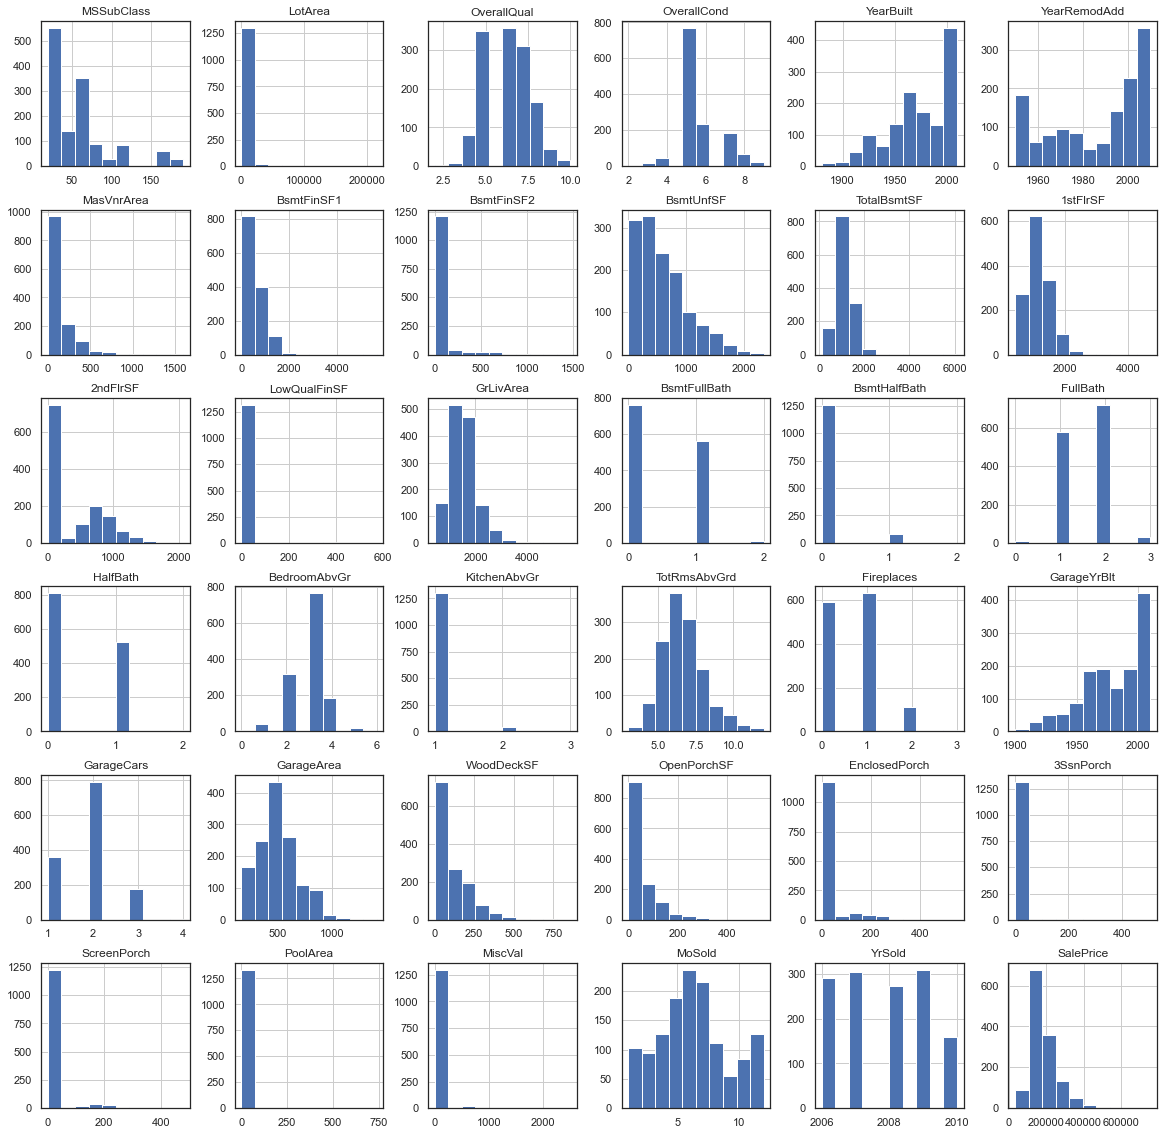

In [47]:
data_num.hist(edgecolor='white', figsize=(20, 20))

`After reviewing the values of the data_num, their distribution, and their relevance in our analysis, we dropped the following # variables:`

In [48]:
data.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageYrBlt', 'MiscVal','LowQualFinSF', '3SsnPorch', 'ScreenPorch', 'GarageArea' ], axis=1, inplace = True)

In [49]:
data.shape

(1336, 65)

`Update the list of numerical variables:`

In [50]:
num_var = data.select_dtypes(include=['int64', 'float']).columns
num_var.shape

(27,)

In [51]:
data_num = data[num_var]

In [52]:
data_num.shape

(1336, 27)

`Check for OutLiers in the # variables:`

In [53]:
help(OutLiersBox)

Help on function OutLiersBox in module functions_plot_EDA:

OutLiersBox(df, nameOfFeature)
    Function to create a BoxPlot and visualise:
    - All Points in the Variable
    - Whiskers in the Variable
    - Suspected Outliers in the variable



In [1]:
data_name = data_num.columns

NameError: name 'data_num' is not defined

In [55]:
feature_number = np.arange(len(data_num.columns))
for i in feature_number:
    feat_n = i
    OutLiersBox(data_num, data_name[i])

In [56]:
data.drop(data[data['LotArea'] > 70000].index, inplace = True) 

In [57]:
data.drop(data[data['MasVnrArea'] > 1200].index, inplace = True) 

In [58]:
data.drop(data[data['TotalBsmtSF'] > 3200].index, inplace = True) 

In [59]:
data.drop(data[data['1stFlrSF'] > 3500].index, inplace = True) 

In [60]:
data.drop(data[data['OpenPorchSF'] > 500].index, inplace = True) 

In [61]:
data.drop(data[data['EnclosedPorch'] > 500].index, inplace = True) 

In [62]:
data.shape

(1325, 65)

`Update the list of numerical variables again:`

In [63]:
num_var = data.select_dtypes(include=['int64', 'float']).columns

In [64]:
data_num = data[num_var]
data_num.shape

(1325, 27)

#### Visual analysis of  # variables with a high correlation to 'SalePrice'

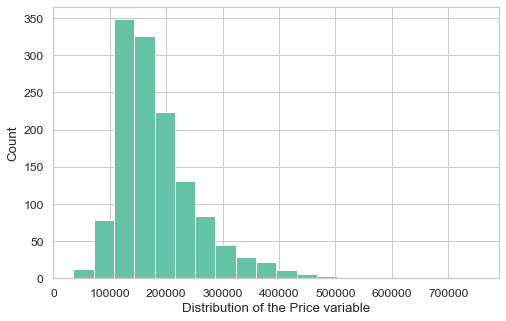

In [65]:
sns.set(style='whitegrid', palette="Set2", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    data['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Distribution of the Price variable', ylabel='Count');

In [66]:
data[data['SalePrice'] >= 745000]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
691           60       RL    21535   Pave      IR1         Lvl    AllPub   
1182          60       RL    15623   Pave      IR1         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
691     Corner       Gtl      NoRidge  ...          Y        382          50   
1182    Corner       Gtl      NoRidge  ...          Y        171          78   

     EnclosedPorch  PoolArea  MoSold  YrSold  SaleType SaleCondition SalePrice  
691              0         0       1    2007        WD        Normal    755000  
1182             0       555       7    2007        WD       Abnorml    745000  

[2 rows x 65 columns]

In [67]:
data.drop([691,1182], axis=0, inplace = True)

In [68]:
data[data['SalePrice'] >= 745000]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageFinish, GarageCars, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, PoolArea, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 65 columns]

In [69]:
data.shape

(1323, 65)

In [71]:
data_corr = data_num.corr()

In [72]:
import plotly.figure_factory as ff

corrs = data_corr

figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.columns),
    annotation_text=corrs.round(2).values,
    showscale=True, colorscale='rdylgn')

figure.update_yaxes(autorange="reversed")

figure.show()

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'PoolArea',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Threshold? (in positive sign, please) 0.60


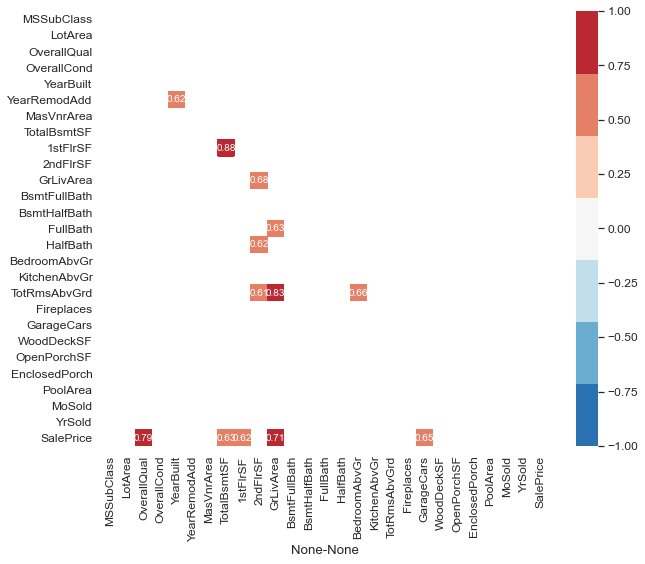

In [73]:
nw = corrCoef_Threshold(data,True)

In [74]:
#data_num_clean = data[['OverallQual', 'GrLivArea','TotalBsmtSF','1stFlrSF','GarageCars', 'SalePrice']].copy()

In [75]:
#data_num_clean.head()

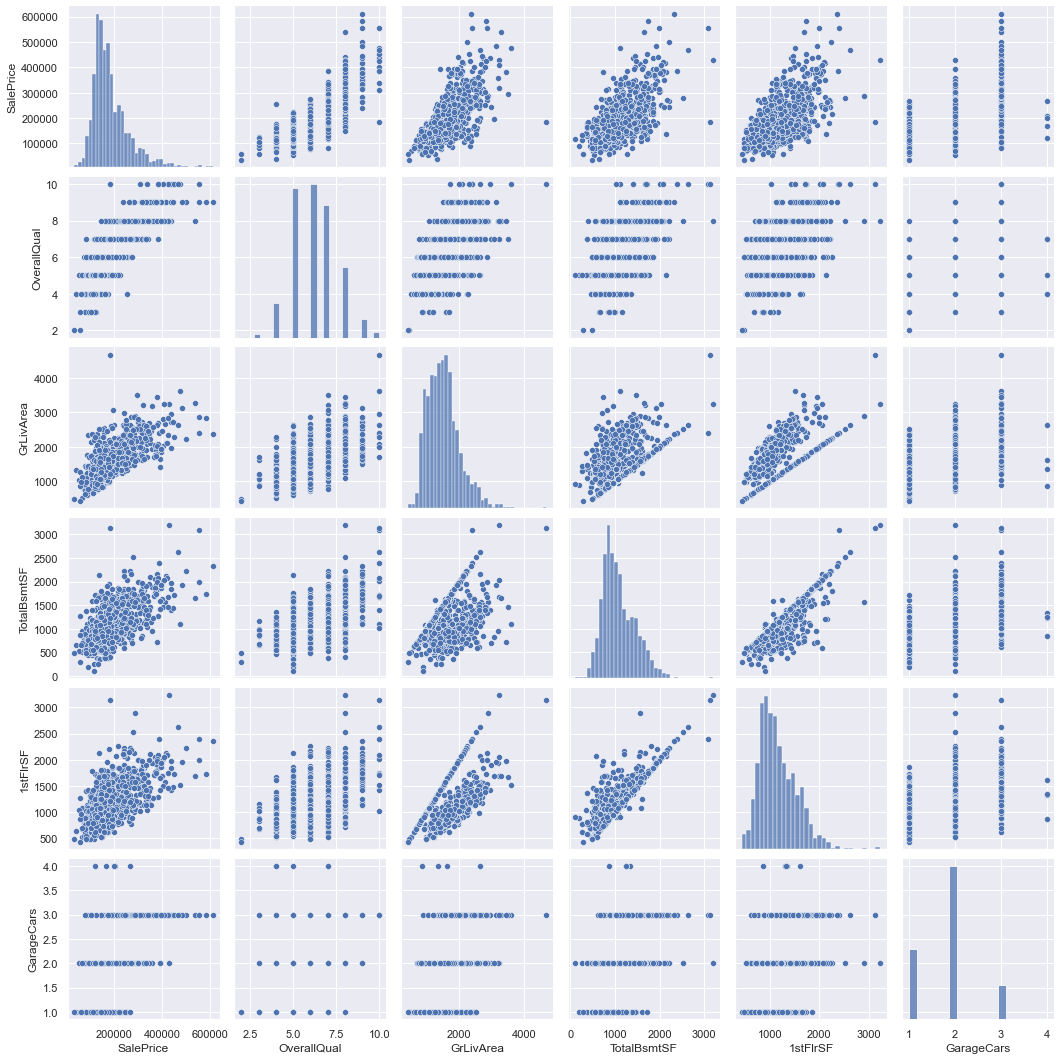

In [76]:
#scatterplot
sns.set()
cols = ['SalePrice','OverallQual', 'GrLivArea','TotalBsmtSF','1stFlrSF','GarageCars']
sns.pairplot(data[cols], size = 2.5)
plt.show()

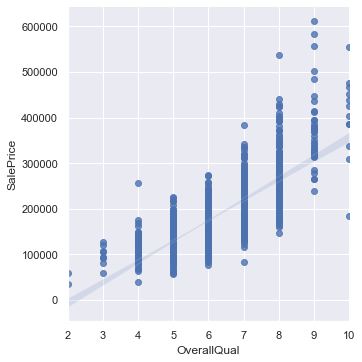

In [77]:
sns.lmplot(x='OverallQual', y='SalePrice', data = data,palette="Set2")

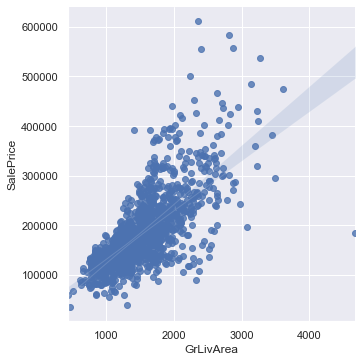

In [78]:
sns.lmplot(x='GrLivArea', y='SalePrice', data = data,palette="Set2")

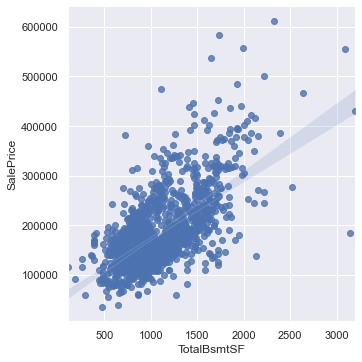

In [79]:
sns.lmplot(x='TotalBsmtSF', y='SalePrice', data = data,palette="Set2")

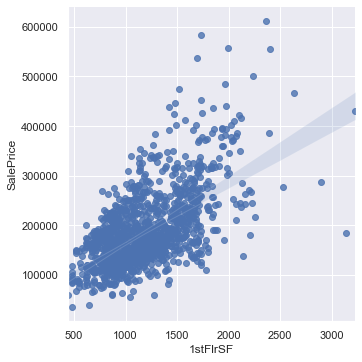

In [80]:
sns.lmplot(x='1stFlrSF', y='SalePrice', data = data,palette="Set2")

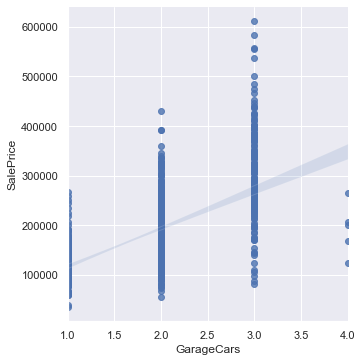

In [81]:
sns.lmplot(x='GarageCars', y='SalePrice', data = data,palette="Set2")

In [82]:
data[data['GarageCars'] == 4]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
420           90       RM     7060   Pave      Reg         Lvl    AllPub   
747           70       RM    11700   Pave      IR1         Lvl    AllPub   
1190         190       RL    32463   Pave      Reg         Low    AllPub   
1340          20       RL     8294   Pave      Reg         Lvl    AllPub   
1350          90       RL    11643   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
420     Inside       Gtl      Mitchel  ...          Y          0           0   
747     Corner       Gtl      OldTown  ...          N        181           0   
1190    Inside       Mod      Mitchel  ...          Y        439           0   
1340    Inside       Gtl        NAmes  ...          Y          0           0   
1350    Inside       Gtl        NAmes  ...          Y          0           0   

     EnclosedPorch  PoolArea  MoSold  YrSold  SaleType SaleCondition SalePrice  
420              0         0      11    2008        WD        Alloca    206300  
747            386         0       5    2009        WD        Normal    265979  
1190             0         0       3    2007        WD        Normal    168000  
1340             0         0       6    2007        WD        Normal    123000  
1350             0         0       8    2009        WD        Normal    200000  

[5 rows x 65 columns]

In [83]:
data.drop([420, 747, 1190, 1340, 1350], axis = 0, inplace = True)

`Update the # variables list:`

In [84]:
num_var = data.select_dtypes(include=['int64', 'float']).columns

In [85]:
data_num = data[num_var]
data_num.shape

(1318, 27)

`

### Analysis of the Categorical Variables:

`Review the values in Categorical Variables to decide which are irrelevant for our analysis and drop them.`

In [86]:
print('Values in Categorical')
print ('--------------------------')

for column in categ_var:
    print(column)
    print(data_cat[column].value_counts())
    print ('--------------------------')

Values in Categorical
--------------------------
MSZoning
RL         1064
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64
--------------------------
Street
Pave    1331
Grvl       5
Name: Street, dtype: int64
--------------------------
LotShape
Reg    829
IR1    457
IR2     40
IR3     10
Name: LotShape, dtype: int64
--------------------------
LandContour
Lvl    1204
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64
--------------------------
Utilities
AllPub    1335
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------
LotConfig
Inside     956
Corner     244
CulDSac     89
FR2         43
FR3          4
Name: LotConfig, dtype: int64
--------------------------
LandSlope
Gtl    1263
Mod      61
Sev      12
Name: LandSlope, dtype: int64
--------------------------
Neighborhood
NAmes      208
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      68
S

In [87]:
data[data['Street'] == 'Grvl']

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
52            90       RM     8472   Grvl      IR2         Bnk    AllPub   
812           20  C (all)     8712   Grvl      Reg         Bnk    AllPub   
1061          30  C (all)    18000   Grvl      Reg         Low    AllPub   
1184          20       RL    35133   Grvl      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
52      Corner       Mod       IDOTRR  ...          Y        106           0   
812     Inside       Mod       IDOTRR  ...          N          0           0   
1061    Inside       Gtl       IDOTRR  ...          Y          0          20   
1184    Inside       Mod       Timber  ...          Y          0         263   

     EnclosedPorch  PoolArea  MoSold  YrSold  SaleType SaleCondition SalePrice  
52               0         0       5    2010        WD        Normal    110000  
812              0         0       6    2010        WD        Alloca     55993  
1061             0         0       8    2008     ConLD        Normal     81000  
1184             0         0       5    2007        WD        Normal    186700  

[4 rows x 65 columns]

In [88]:
data[data['Utilities'] == 'NoSeWa']

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
944          20       RL    14375   Pave      IR1         Lvl    NoSeWa   

    LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
944   CulDSac       Gtl       Timber  ...          Y          0         118   

    EnclosedPorch  PoolArea  MoSold  YrSold  SaleType SaleCondition SalePrice  
944             0         0       1    2009       COD       Abnorml    137500  

[1 rows x 65 columns]

In [89]:
data.drop([944], axis=0, inplace = True)

In [90]:
data.drop(['Street', 'LotShape', 'Utilities','Condition2', 'RoofMatl', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'], axis=1, inplace = True)

In [91]:
data.shape

(1317, 52)

`Update the list of categorical variables:`

In [92]:
categ_var = data.select_dtypes(include=['category', object]).columns

In [93]:
data_cat = data[categ_var]
data_cat.shape

(1317, 25)

#### Visual analysis of categorical variables related to SalePrice:

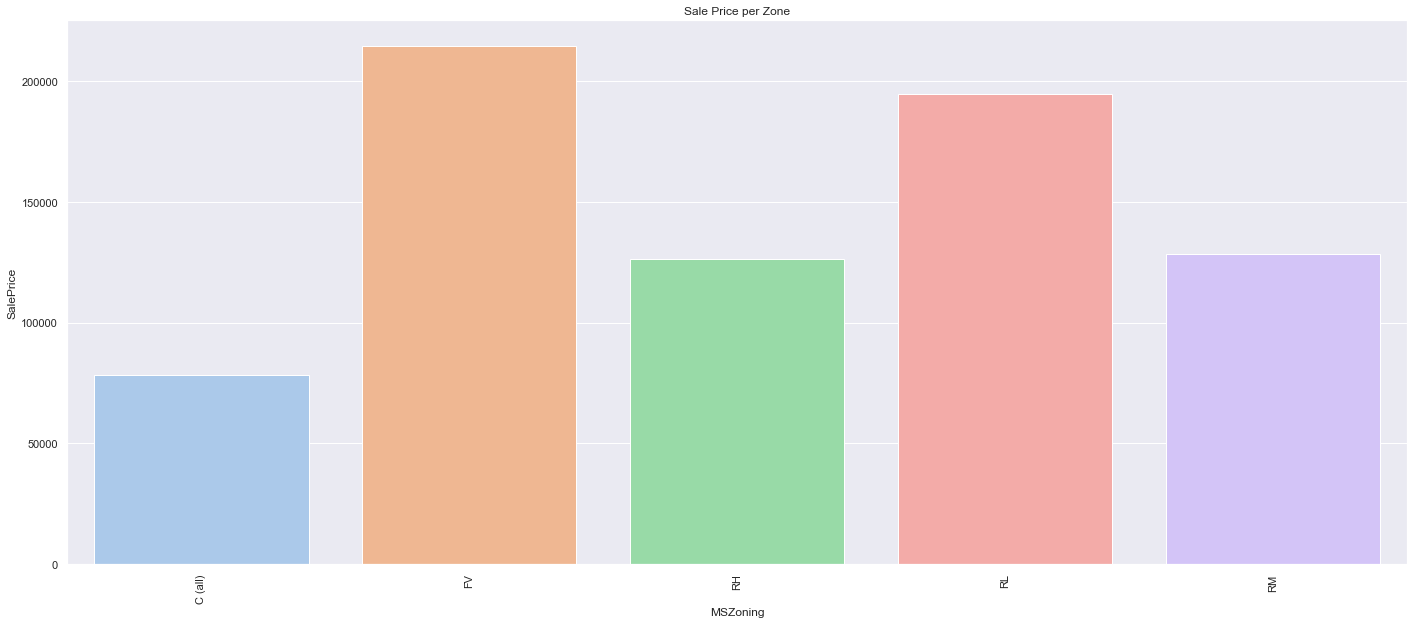

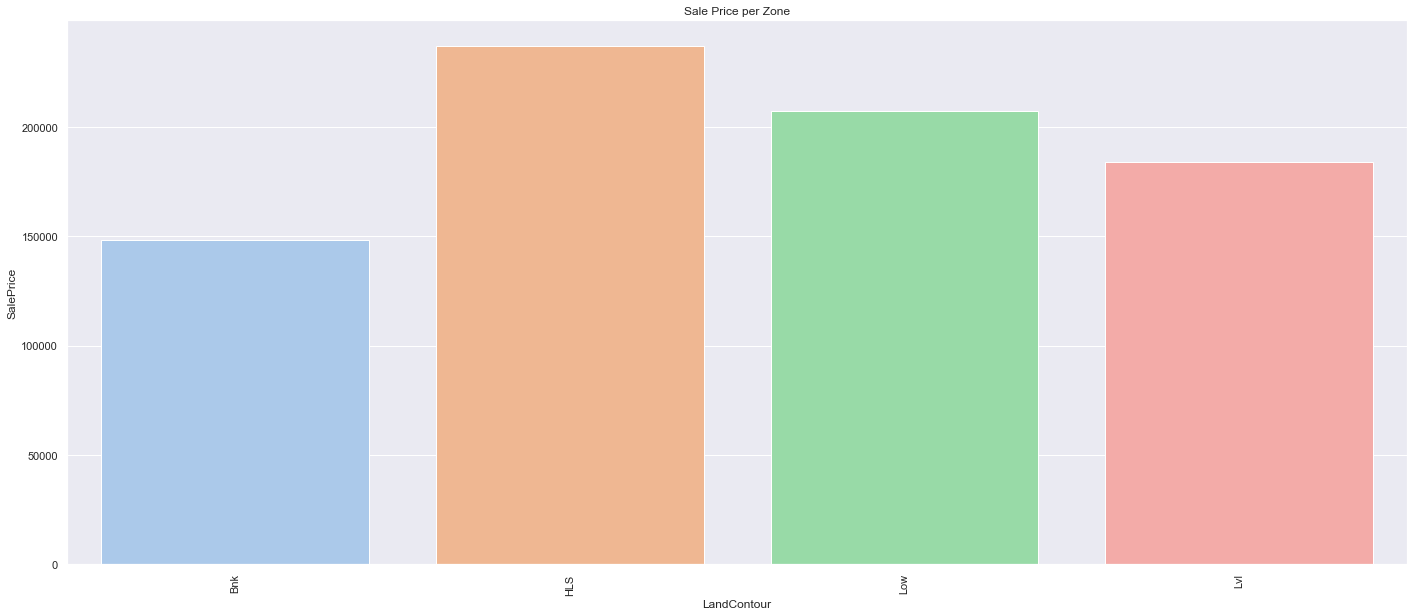

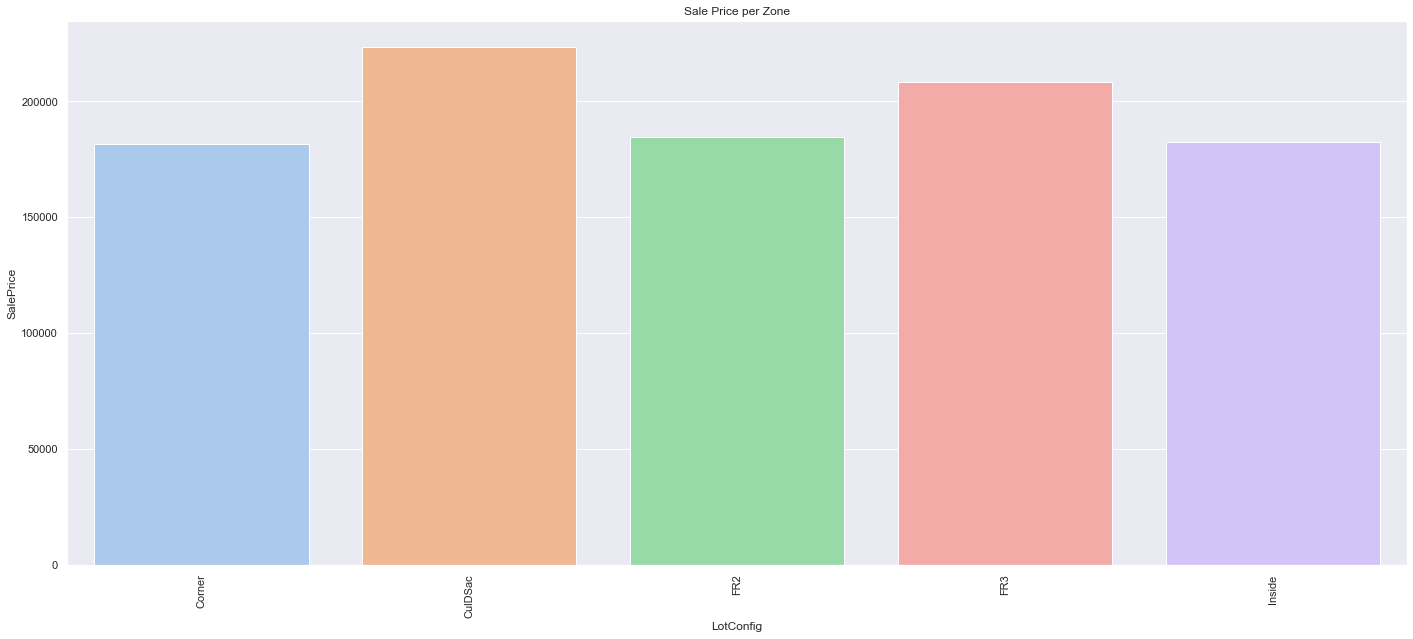

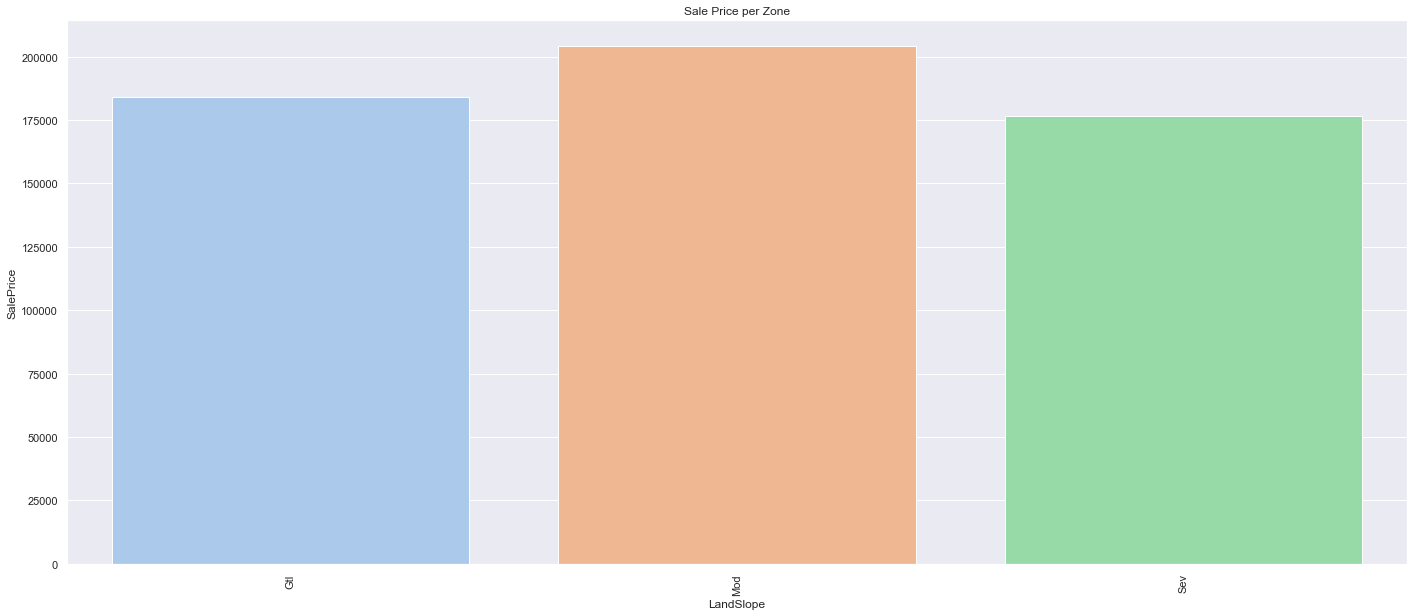

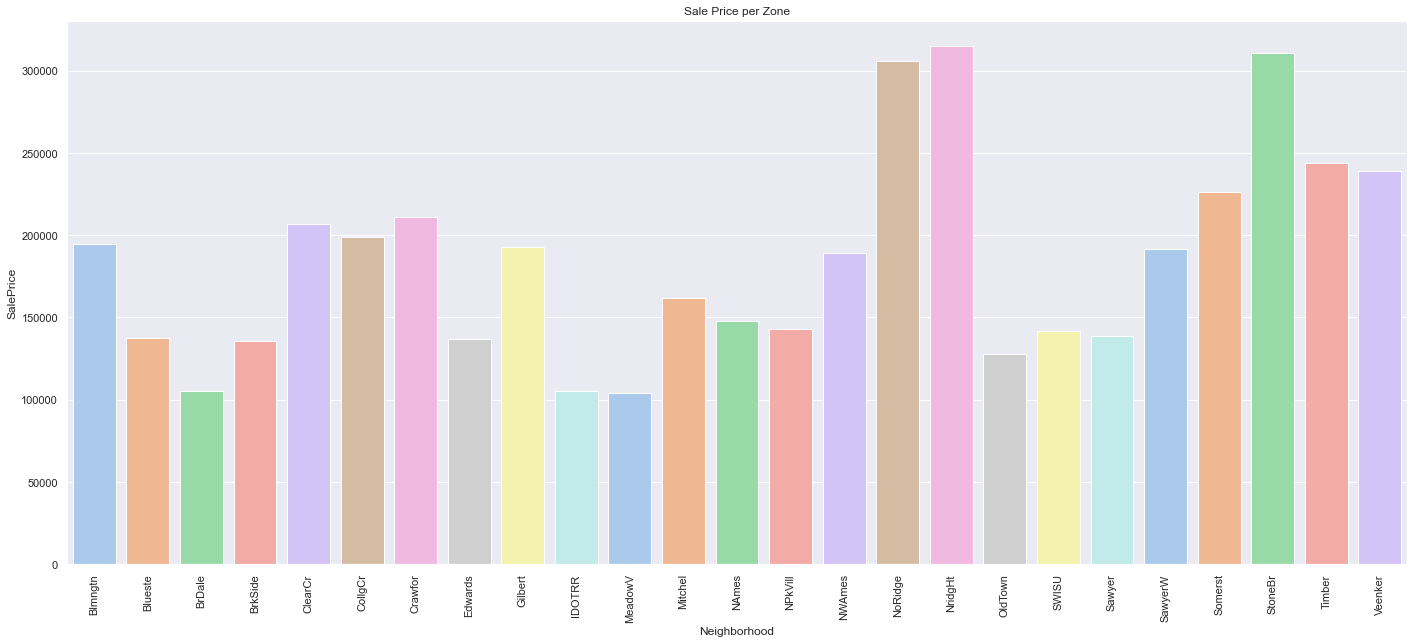

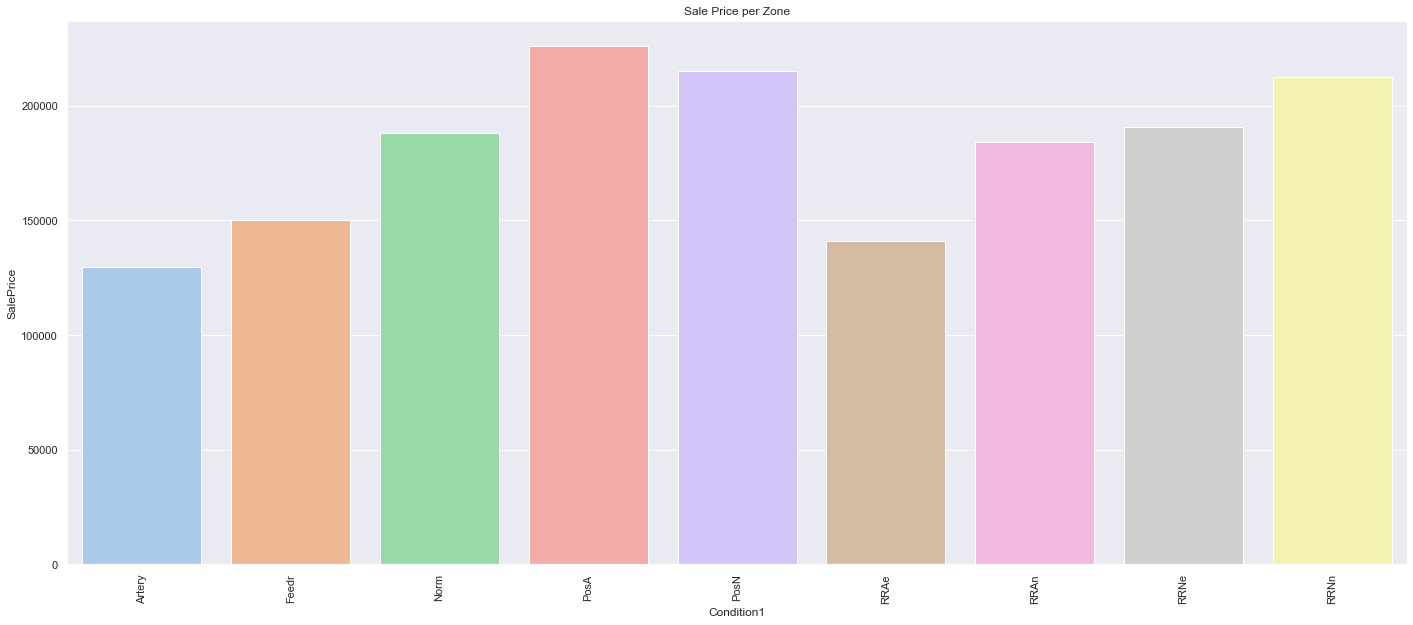

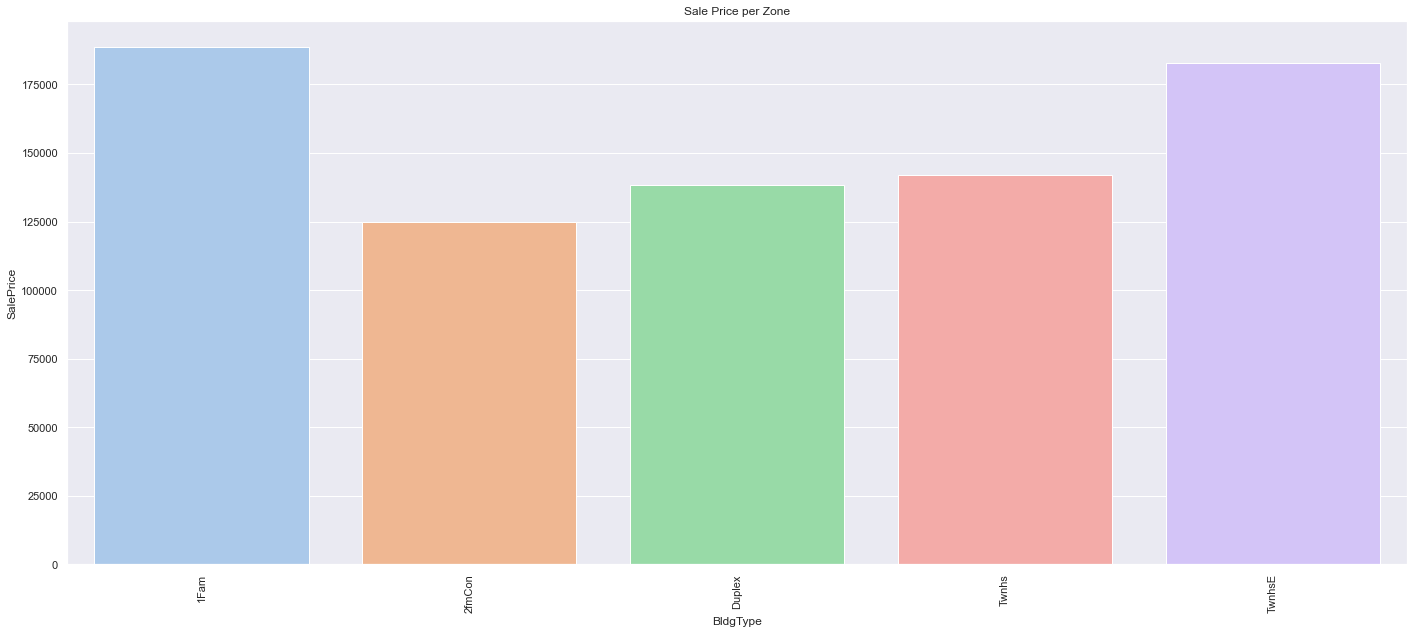

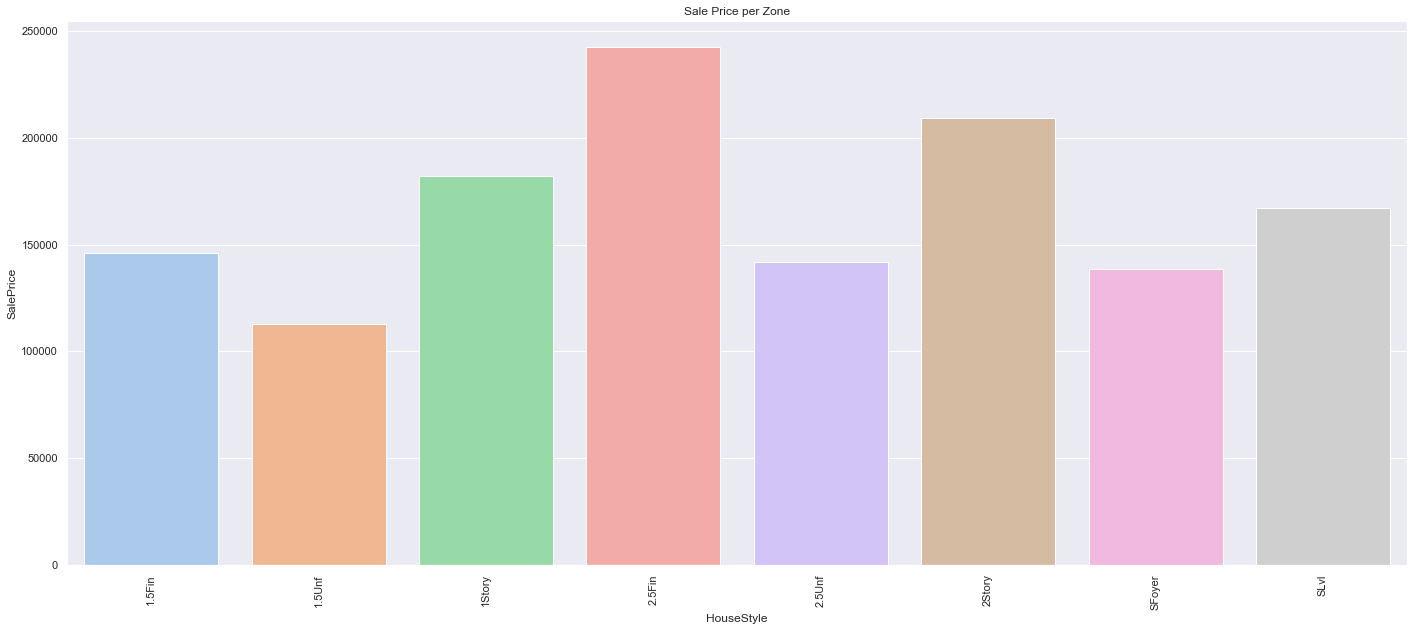

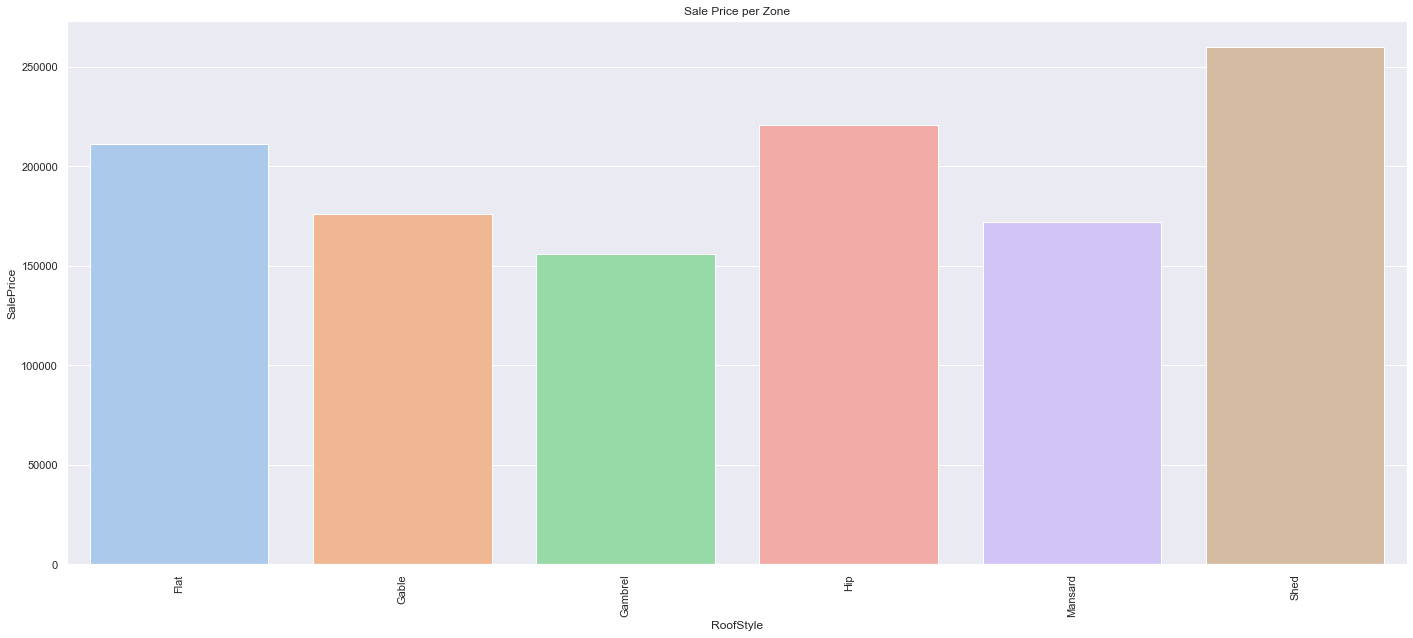

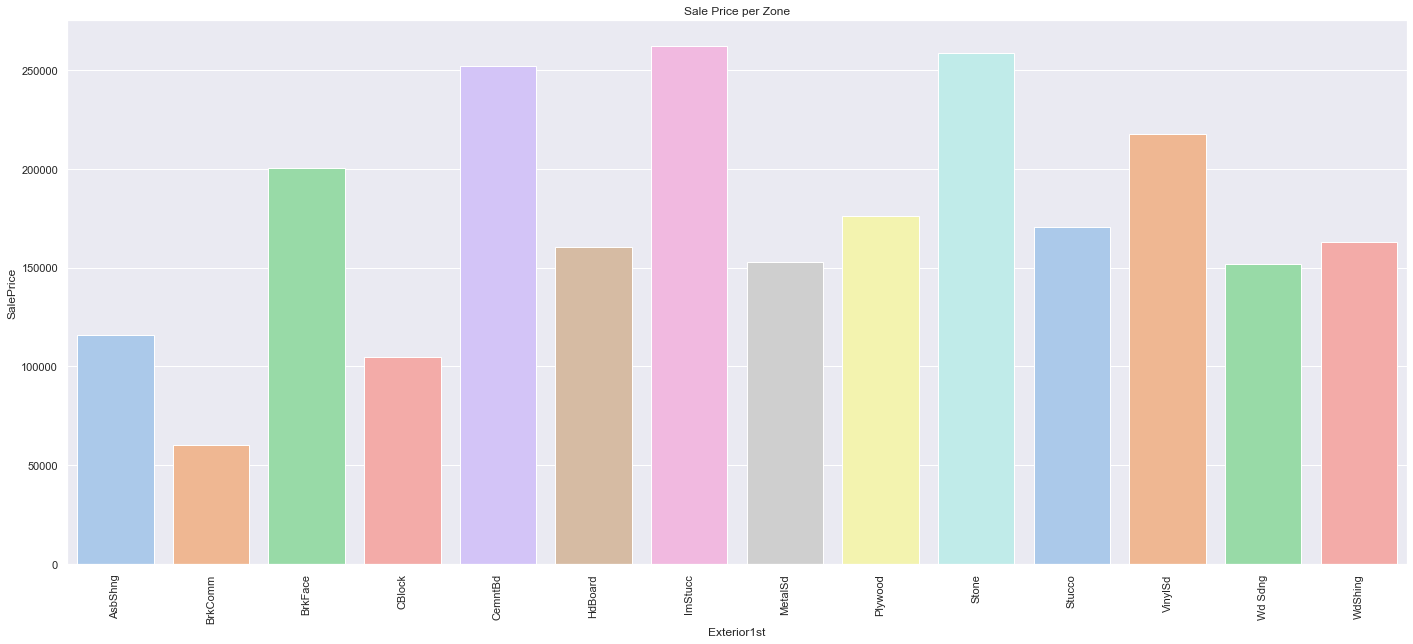

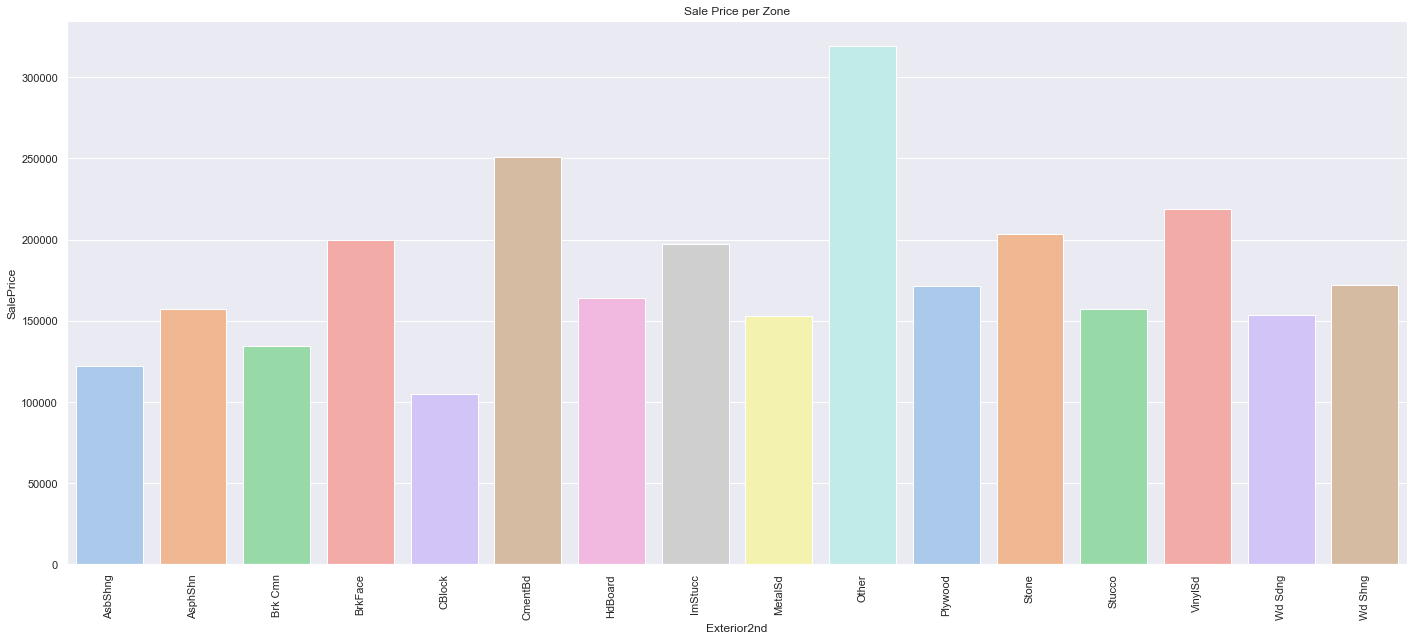

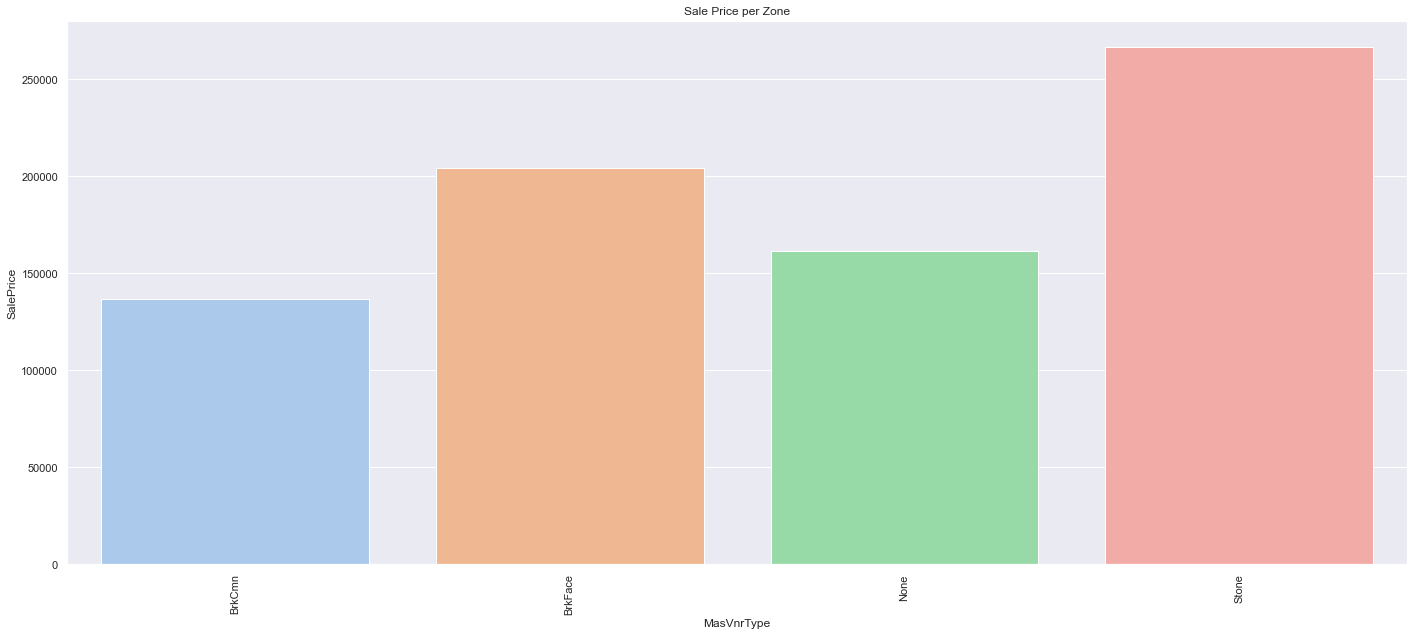

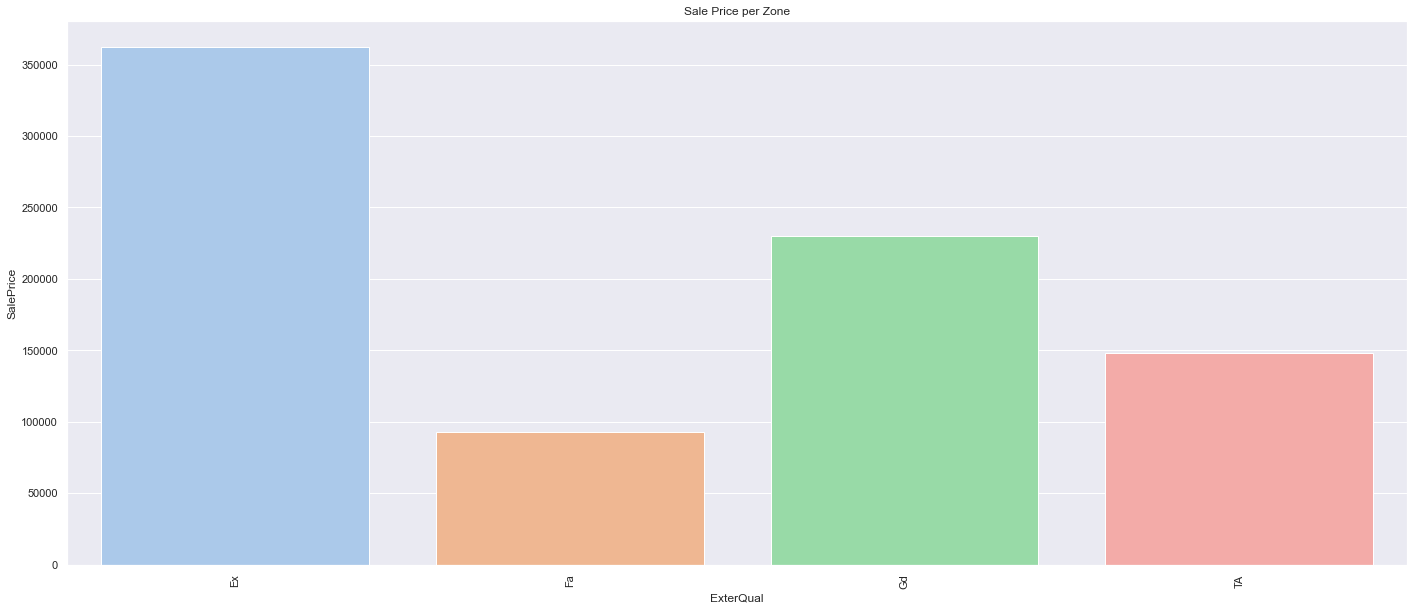

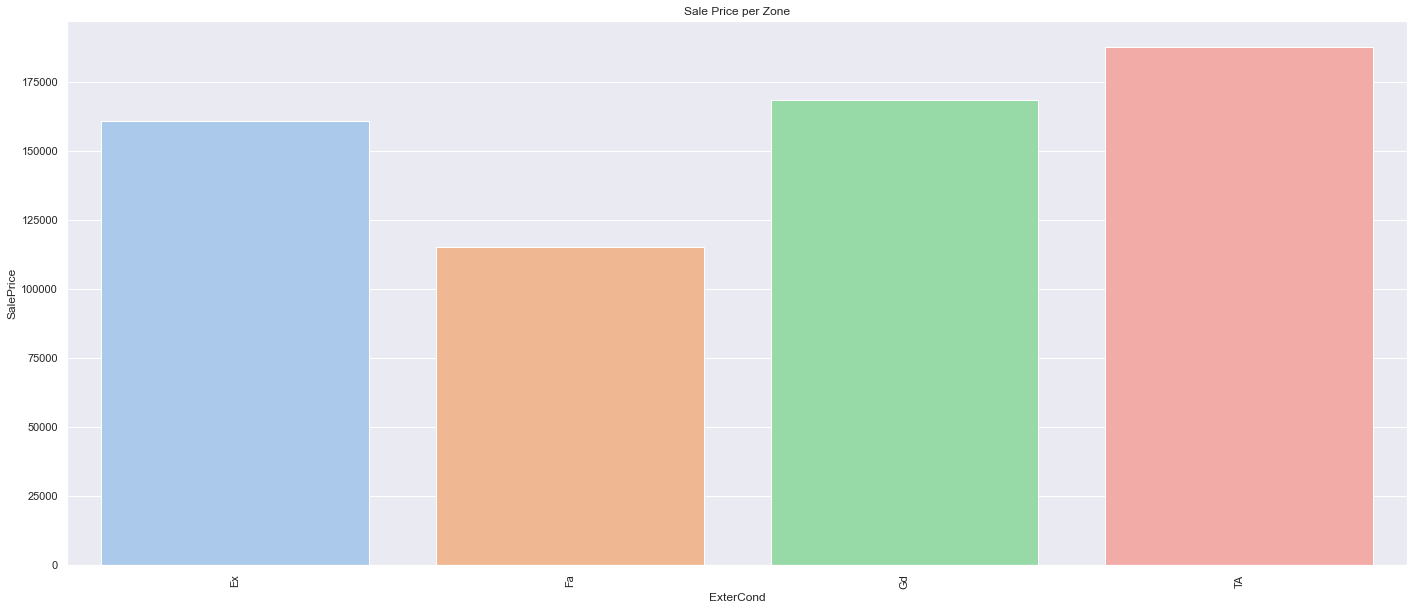

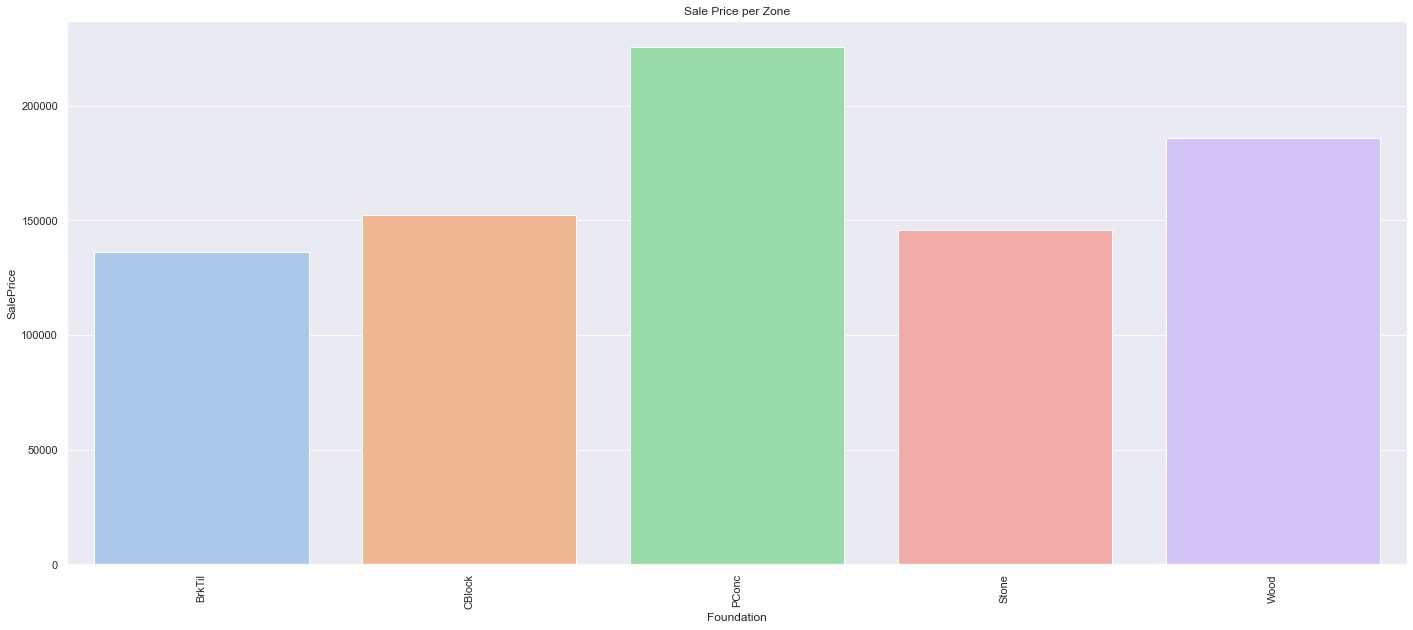

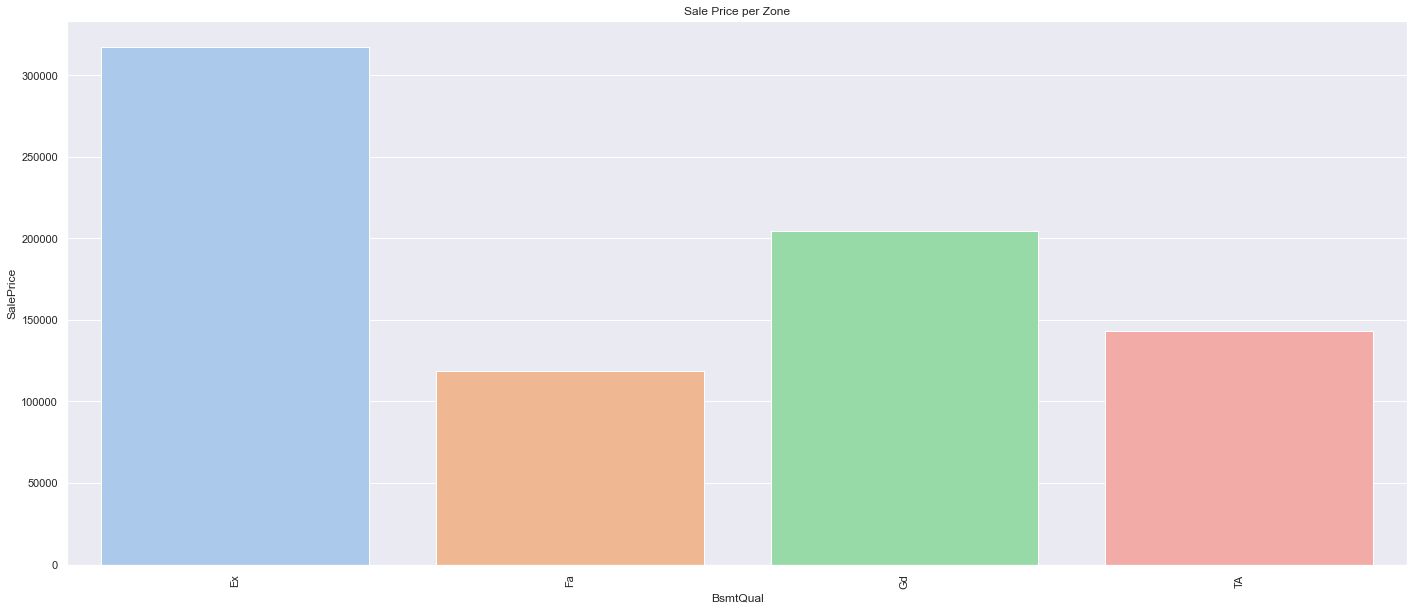

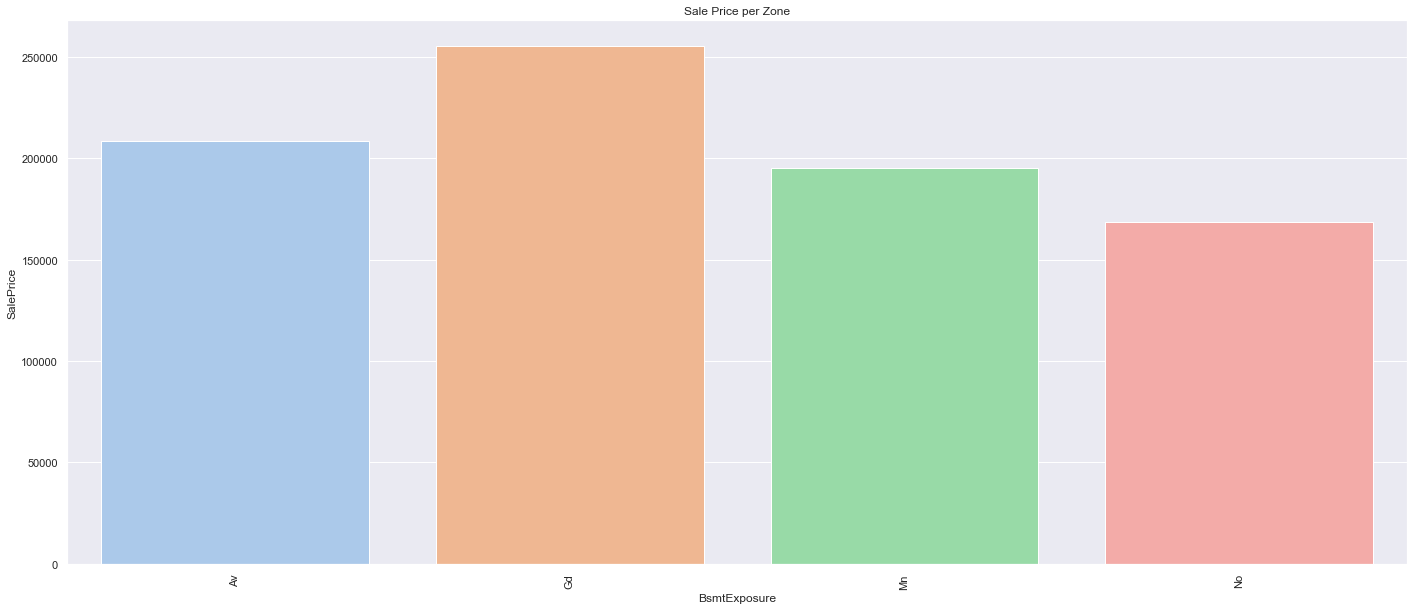

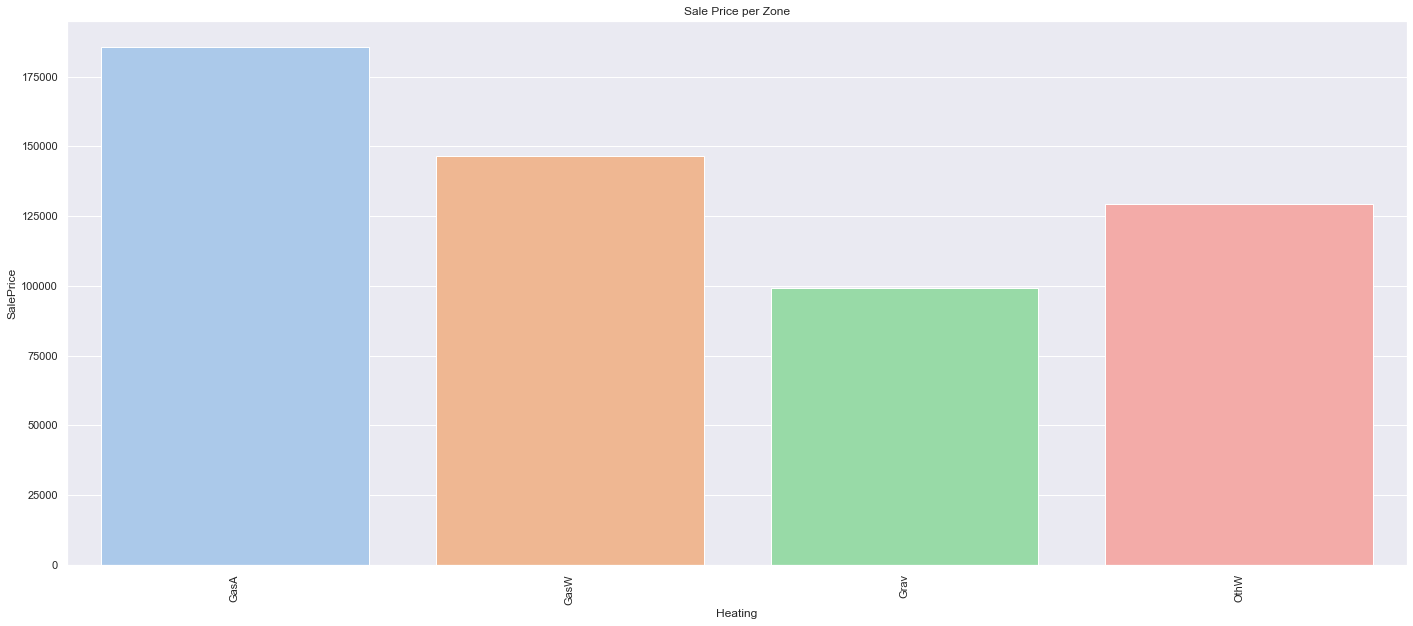

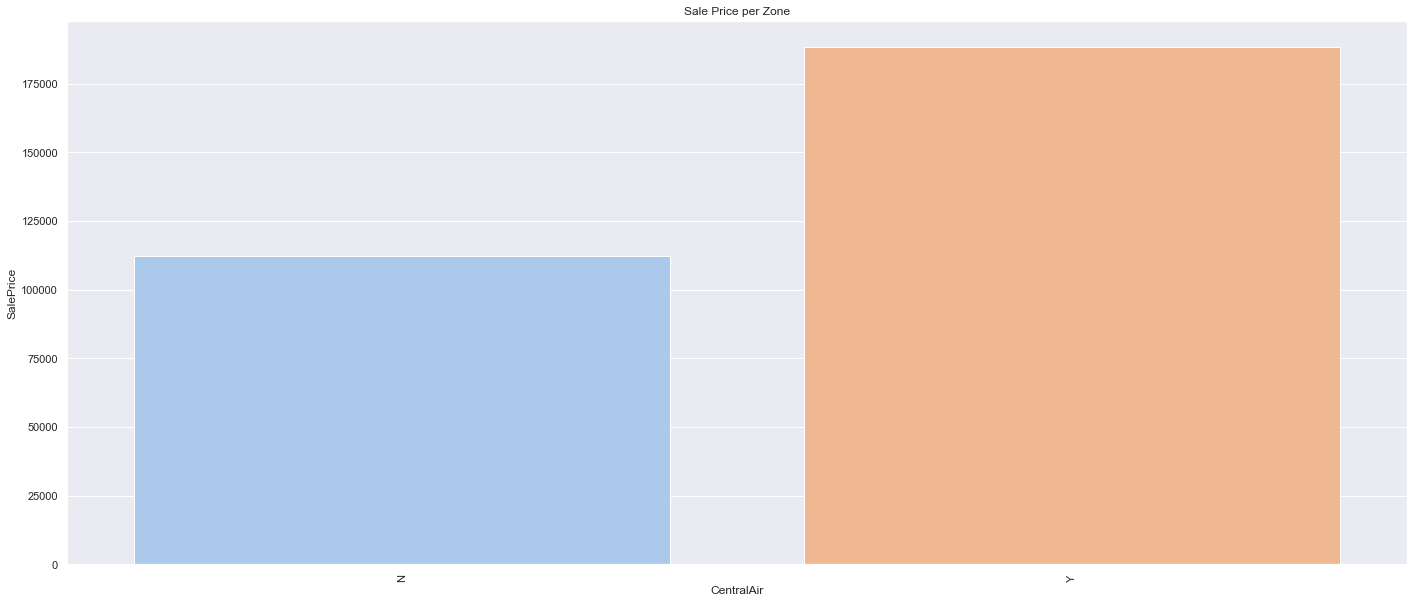

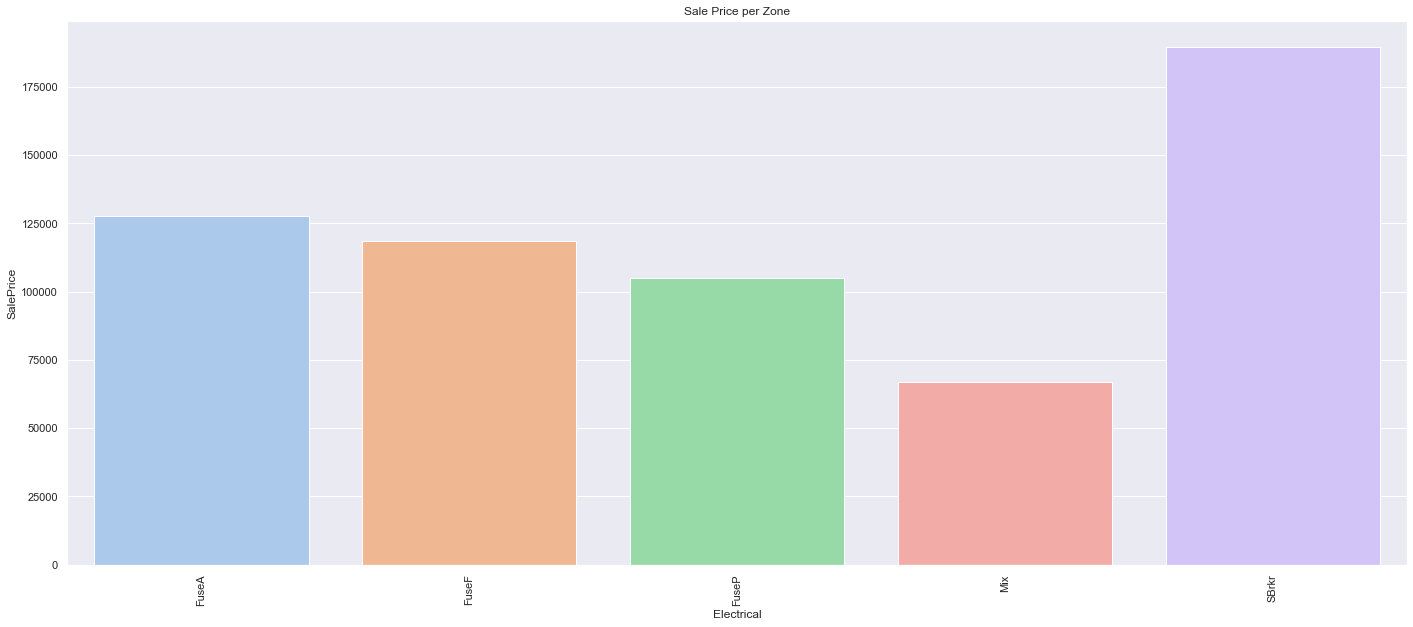

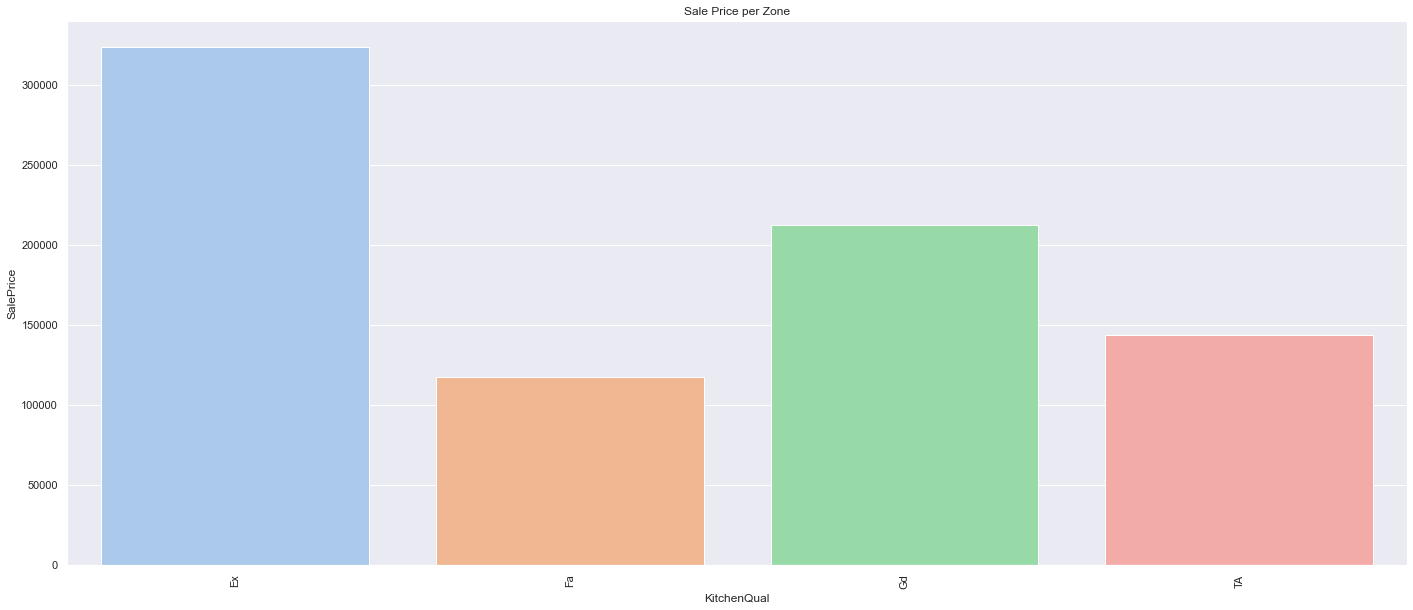

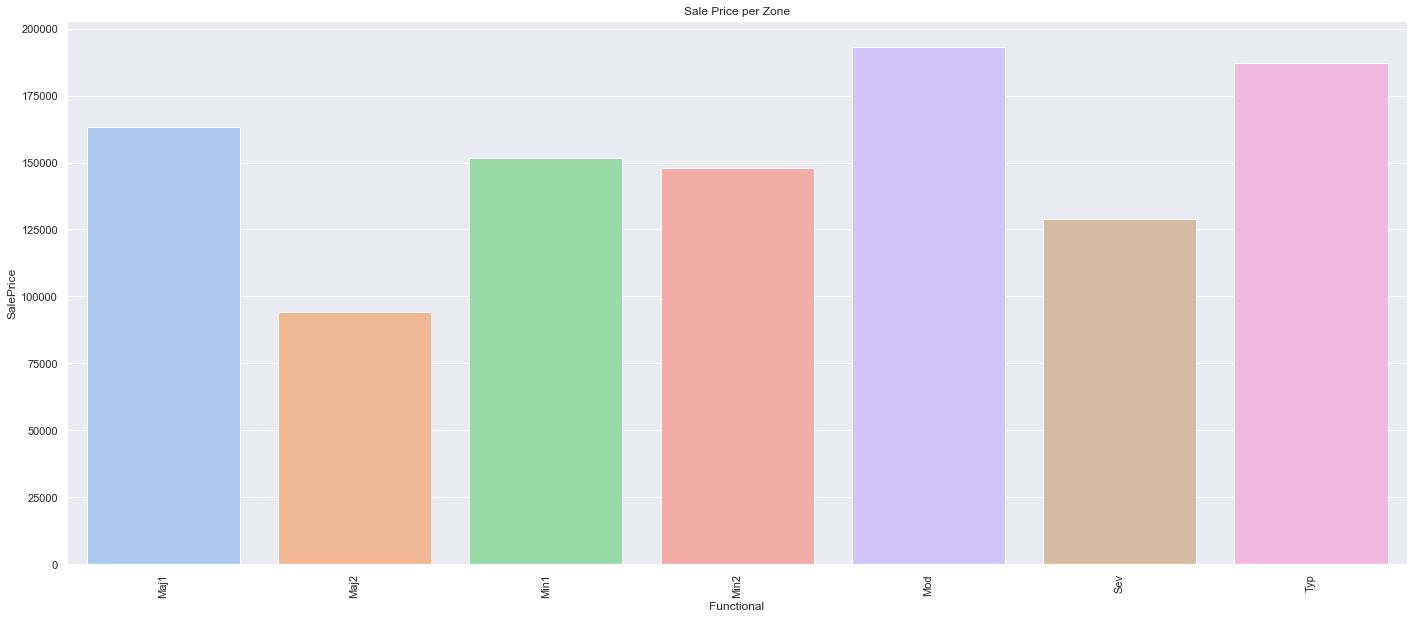

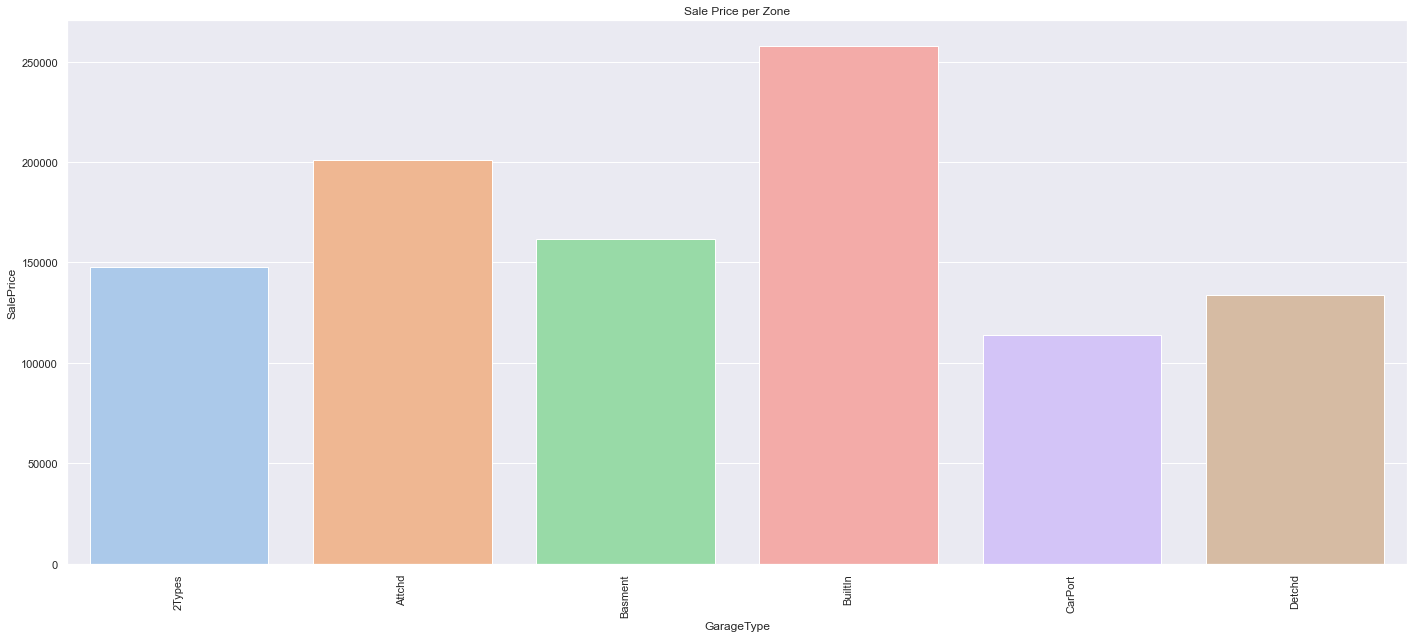

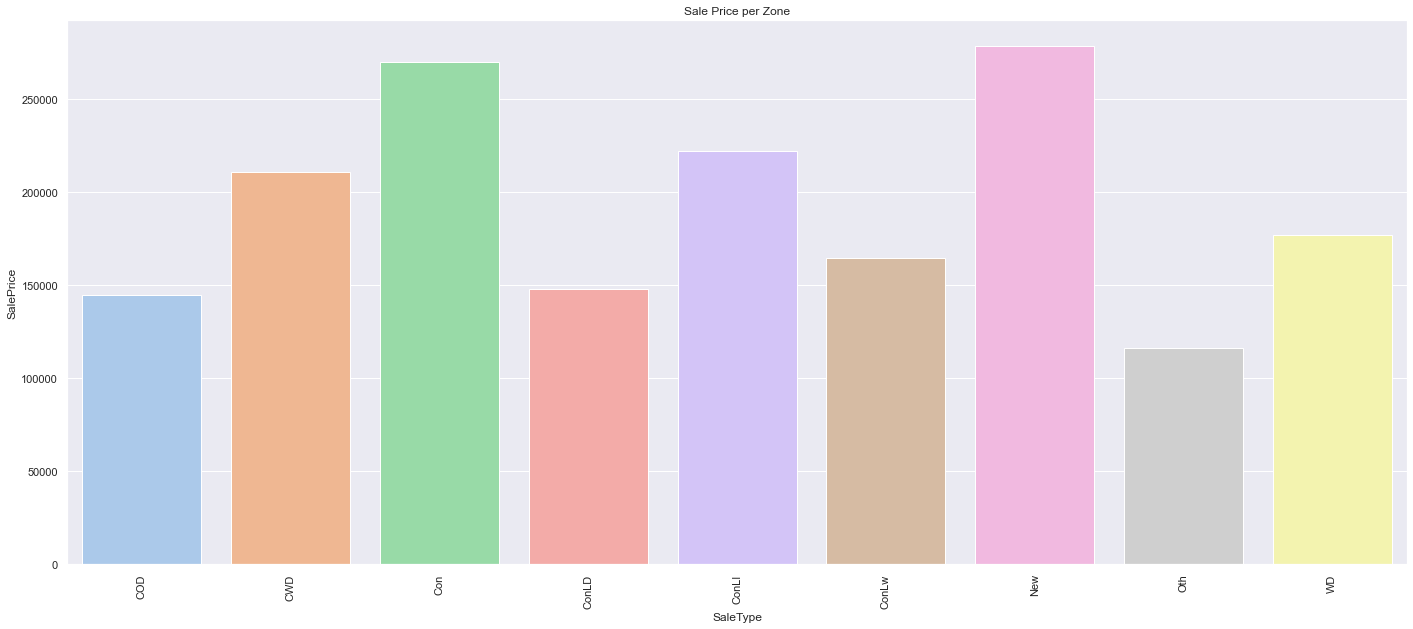

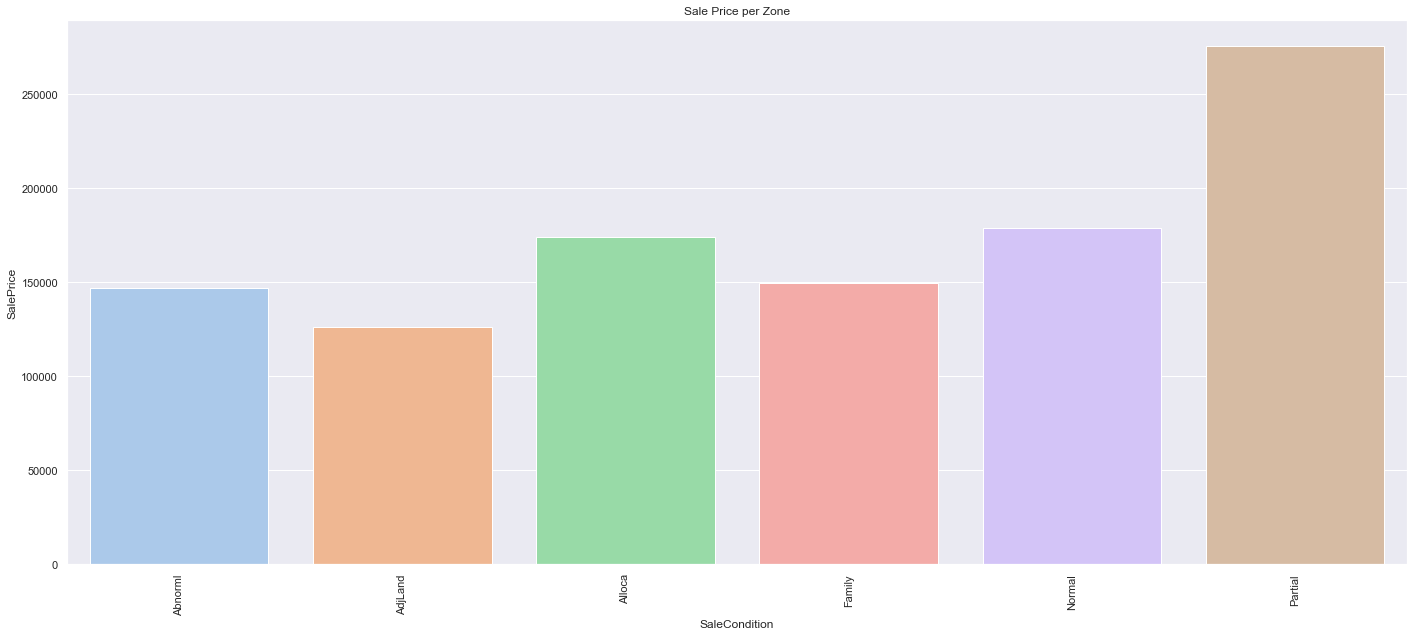

In [94]:

for column in categ_var: 
    column_name = column
    column = data_cat[column]
    mean = data.groupby(column)['SalePrice'].mean()
    mean.index
    mean.values
    
    plt.figure(figsize=(24,10))
    ax=sns.barplot(x=mean.index,y=mean.values,palette="pastel")

    plt.xticks(rotation=90)
    plt.xlabel(column_name)  
    plt.ylabel('SalePrice')
    plt.title('Sale Price per Zone') 
    
 

In [95]:
for column_name in categ_var: 
    column = data_cat[column_name]
    mean = data.groupby(column)['SalePrice'].mean()
    difference = round(mean.max()-mean.min(),2)
    
    total_mean = round(data.SalePrice.mean(),2)
    percentage = round(((difference/total_mean)*100),2)
    
    if percentage >= 100:
            
        print ('--------')
        print (column_name)
        print ('Min', round(mean.min(),2))
        print ('Max', round(mean.max(),2))
        print ('Difference', difference)
        print ('Total mean', total_mean)
        print ('Percentage_diff', percentage)
    
    else:
        data = data.drop([column_name], axis=1)

    

--------
Neighborhood
Min 103816.67
Max 314717.84
Difference 210901.17
Total mean 184997.75
Percentage_diff 114.0
--------
Exterior1st
Min 60000.0
Max 262000.0
Difference 202000.0
Total mean 184997.75
Percentage_diff 109.19
--------
Exterior2nd
Min 105000.0
Max 319000.0
Difference 214000.0
Total mean 184997.75
Percentage_diff 115.68
--------
ExterQual
Min 92713.29
Max 362453.54
Difference 269740.26
Total mean 184997.75
Percentage_diff 145.81
--------
BsmtQual
Min 118853.78
Max 317430.74
Difference 198576.96
Total mean 184997.75
Percentage_diff 107.34
--------
KitchenQual
Min 117275.78
Max 323808.16
Difference 206532.38
Total mean 184997.75
Percentage_diff 111.64


In [96]:
data_num_clean = data[['OverallQual', 'GrLivArea','TotalBsmtSF','1stFlrSF','GarageCars', 'SalePrice']].copy()

In [97]:
data_num_clean.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars',
       'SalePrice'],
      dtype='object')

In [98]:
data_cat_clean = data[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'ExterQual','BsmtQual','KitchenQual']].copy()

In [99]:
data_cat_clean.columns

Index(['Neighborhood', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'BsmtQual',
       'KitchenQual'],
      dtype='object')

In [100]:
data_cat_clean.shape

(1317, 6)

In [101]:
data_num_clean.shape

(1317, 6)

### Study the target variable  

In [102]:
data_num_clean.shape

(1317, 6)

In [103]:
data_num_clean['SalePrice'].describe()

count      1317.000000
mean     184997.749431
std       74903.261718
min       35311.000000
25%      135000.000000
50%      167900.000000
75%      217500.000000
max      611657.000000
Name: SalePrice, dtype: float64

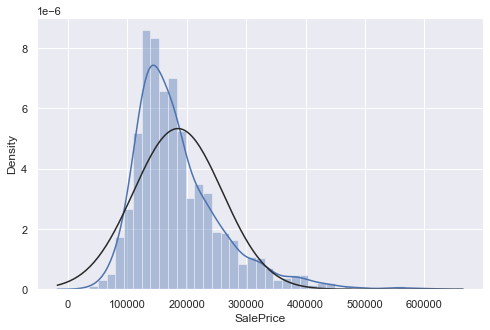

<Figure size 576x360 with 0 Axes>

In [104]:
sns.distplot(data_num_clean['SalePrice'], fit=norm);
fig = plt.figure()

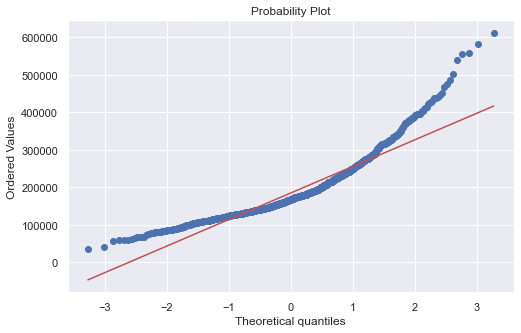

In [105]:
#Normal probability plot
res = stats.probplot(data_num_clean['SalePrice'], plot=plt)

### Converting categorical data to dummies

In [106]:
data_cat_clean.head()

Neighborhood Exterior1st Exterior2nd ExterQual BsmtQual KitchenQual
0      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd
1      Veenker     MetalSd     MetalSd        TA       Gd          TA
2      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd
3      Crawfor     Wd Sdng     Wd Shng        TA       TA          Gd
4      NoRidge     VinylSd     VinylSd        Gd       Gd          Gd

In [107]:
data_cat_clean.shape

(1317, 6)

In [108]:
def find_categorical_uniques(df):
    categorical_col = []
    for column in df.columns:
        if df[column].dtype == object and len(df[column].unique()) <= 50:
            categorical_col.append(column)
            print(f"{column} : {df[column].unique()}")
            print("====================================")
            print()
    return categorical_col

In [109]:
categorical_col = find_categorical_uniques(data_cat_clean)

Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'Stucco' 'AsbShng' 'BrkComm' 'Stone' 'ImStucc' 'CBlock']

Exterior2nd : ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']

ExterQual : ['Gd' 'TA' 'Ex' 'Fa']

BsmtQual : ['Gd' 'TA' 'Ex' 'Fa']

KitchenQual : ['Gd' 'TA' 'Ex' 'Fa']



`LabelEncoder()`

In [110]:
cat_data_le = data_cat_clean.copy()

In [111]:
from sklearn.preprocessing import LabelEncoder

# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
cat_data_le['Neighborhood_code'] = lb_make.fit_transform(data_cat_clean['Neighborhood'])

cat_data_le.head() #Results in appending a new column to df

Neighborhood Exterior1st Exterior2nd ExterQual BsmtQual KitchenQual  \
0      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd   
1      Veenker     MetalSd     MetalSd        TA       Gd          TA   
2      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd   
3      Crawfor     Wd Sdng     Wd Shng        TA       TA          Gd   
4      NoRidge     VinylSd     VinylSd        Gd       Gd          Gd   

   Neighborhood_code  
0                  5  
1                 24  
2                  5  
3                  6  
4                 15

In [112]:
from sklearn.preprocessing import LabelEncoder

# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
cat_data_le['Exterior1st_code'] = lb_make.fit_transform(data_cat_clean['Exterior1st'])

cat_data_le.head() #Results in appending a new column to df

Neighborhood Exterior1st Exterior2nd ExterQual BsmtQual KitchenQual  \
0      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd   
1      Veenker     MetalSd     MetalSd        TA       Gd          TA   
2      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd   
3      Crawfor     Wd Sdng     Wd Shng        TA       TA          Gd   
4      NoRidge     VinylSd     VinylSd        Gd       Gd          Gd   

   Neighborhood_code  Exterior1st_code  
0                  5                11  
1                 24                 7  
2                  5                11  
3                  6                12  
4                 15                11

In [113]:
from sklearn.preprocessing import LabelEncoder

# Step 1. Instantiate the model (label encoding)
lb_make = LabelEncoder() 

# Step 2. Fit the variable to the instatiated model
cat_data_le['Exterior2nd_code'] = lb_make.fit_transform(data_cat_clean['Exterior2nd'])

cat_data_le.head() #Results in appending a new column to df

Neighborhood Exterior1st Exterior2nd ExterQual BsmtQual KitchenQual  \
0      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd   
1      Veenker     MetalSd     MetalSd        TA       Gd          TA   
2      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd   
3      Crawfor     Wd Sdng     Wd Shng        TA       TA          Gd   
4      NoRidge     VinylSd     VinylSd        Gd       Gd          Gd   

   Neighborhood_code  Exterior1st_code  Exterior2nd_code  
0                  5                11                13  
1                 24                 7                 8  
2                  5                11                13  
3                  6                12                15  
4                 15                11                13

In [114]:
cat_data_le.shape

(1317, 9)

`Category Encoder`

In [115]:
label_vars = ['ExterQual','BsmtQual','KitchenQual']

In [116]:
import category_encoders as ce

# Step 1. Instantiate the model with the necessary inputs
encoder = ce.OrdinalEncoder(cols= label_vars)

# Step 2. Fit the variable to the instatiated model
cat_data_ce = encoder.fit_transform(data_cat_clean)

In [117]:
cat_data_ce[label_vars].head()

ExterQual  BsmtQual  KitchenQual
0          1         1            1
1          2         1            2
2          1         1            1
3          2         2            1
4          1         1            1

In [118]:
cat_data_ce.shape

(1317, 6)

In [119]:
cat_data_le.head()

Neighborhood Exterior1st Exterior2nd ExterQual BsmtQual KitchenQual  \
0      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd   
1      Veenker     MetalSd     MetalSd        TA       Gd          TA   
2      CollgCr     VinylSd     VinylSd        Gd       Gd          Gd   
3      Crawfor     Wd Sdng     Wd Shng        TA       TA          Gd   
4      NoRidge     VinylSd     VinylSd        Gd       Gd          Gd   

   Neighborhood_code  Exterior1st_code  Exterior2nd_code  
0                  5                11                13  
1                 24                 7                 8  
2                  5                11                13  
3                  6                12                15  
4                 15                11                13

In [120]:
cat_data_ce.head()

Neighborhood Exterior1st Exterior2nd  ExterQual  BsmtQual  KitchenQual
0      CollgCr     VinylSd     VinylSd          1         1            1
1      Veenker     MetalSd     MetalSd          2         1            2
2      CollgCr     VinylSd     VinylSd          1         1            1
3      Crawfor     Wd Sdng     Wd Shng          2         2            1
4      NoRidge     VinylSd     VinylSd          1         1            1

In [121]:
cat_data_ce.shape

(1317, 6)

In [122]:
cat_data_le.shape

(1317, 9)

In [123]:
cat_data_le.drop(['Neighborhood', 'Exterior1st', 'Exterior2nd','ExterQual', 'BsmtQual','KitchenQual'], axis = 1, inplace = True)

In [124]:
cat_data_ce.drop(['Neighborhood', 'Exterior1st', 'Exterior2nd'], axis = 1, inplace = True)

In [125]:
cat_data_ = pd.concat([cat_data_le,cat_data_ce],axis=1)

In [126]:
cat_data_

Neighborhood_code  Exterior1st_code  Exterior2nd_code  ExterQual  \
0                     5                11                13          1   
1                    24                 7                 8          2   
2                     5                11                13          1   
3                     6                12                15          2   
4                    15                11                13          1   
...                 ...               ...               ...        ...   
1455                  8                11                13          2   
1456                 14                 8                10          2   
1457                  6                 4                 5          3   
1458                 12                 7                 8          2   
1459                  7                 5                 6          1   

      BsmtQual  KitchenQual  
0            1            1  
1            1            2  
2            1            1  
3            2            1  
4            1            1  
...        ...          ...  
1455         1            2  
1456         1            2  
1457         2            1  
1458         2            1  
1459         2            2  

[1317 rows x 6 columns]

In [127]:
data_num_clean.shape

(1317, 6)

In [128]:
cat_data_.shape

(1317, 6)

In [129]:
data_final = pd.concat([data_num_clean,cat_data_],axis=1)

In [130]:
data_final.shape

(1317, 12)

In [131]:
data_final.head()

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  GarageCars  SalePrice  \
0            7       1710          856       856           2     208500   
1            6       1262         1262      1262           2     181500   
2            7       1786          920       920           2     223500   
3            7       1717          756       961           3     140000   
4            8       2198         1145      1145           3     250000   

   Neighborhood_code  Exterior1st_code  Exterior2nd_code  ExterQual  BsmtQual  \
0                  5                11                13          1         1   
1                 24                 7                 8          2         1   
2                  5                11                13          1         1   
3                  6                12                15          2         2   
4                 15                11                13          1         1   

   KitchenQual  
0            1  
1            2  
2            1  
3            1  
4            1

### Save the dataset in a new csv

In [132]:
data_final.to_csv('house_prices_data_final.csv')